# **Proyecto Predicci√≥n COVID**





**1.	Definici√≥n del problema real**

Uno de los mayores desaf√≠os que el mundo ha enfrentado en los √∫ltimos tiempos ha sido la pandemia generada por el coronavirus (COVID-19). Desde los primeros reportes de infectados en diciembre de 2019, diferentes sectores han tenido una carrera contrarreloj para intentar anticiparse a los efectos que el s√≠ndrome de Corona Virus 2 (SARS-CoV-2) tiene sobre la sociedad. Estas necesidades de informaci√≥n y manejo eficiente de la misma no solamente tienen un inter√©s m√©dico, sino que debido a su impacto generalizado es fundamental para la emisi√≥n de pol√≠ticas p√∫blicas y medidas de control a la poblaci√≥n.
El 26 de febrero de 2020, fue reportado el primer caso de COVID-19 en Latinoam√©rica, donde hasta ese momento era la √∫nica regi√≥n del mundo donde no hab√≠a logrado alcanzar la pandemia. Esto presupone que los pa√≠ses de esta regi√≥n contaron con una ventaja en t√©rminos de tiempo para prepararse a las medidas y controles a efectuarse frente a esta contingencia, as√≠ como aprendizaje del comportamiento que este virus tuvo en los primeros pa√≠ses que lo sufrieron.
El 6 de marzo de 2020, se confirm√≥ el primer caso de COVID-19 en Colombia, entrando as√≠ en la fase de contenci√≥n y dando inicio a la recolecci√≥n de informaci√≥n derivada del comportamiento del virus en nuestro pa√≠s. Esta informaci√≥n es la base para el entendimiento del comportamiento del virus y la proyecci√≥n de comportamientos futuros que sirvan de soporte para la planeaci√≥n de medidas de contingencia, disponibilidad de servicios de salud, generaci√≥n de pol√≠ticas econ√≥micas y sociales, entre otros.


**2.	Definici√≥n del problema de anal√≠tica.**

El pron√≥stico de n√∫mero de casos confirmados, activos, recuperados o fallecidos, constituye un problema anal√≠tico al tratarse de un suceso en curso, cuyo comportamiento depende de una serie de fen√≥menos de los que no se encuentra informaci√≥n estructurada, y por esta raz√≥n se dificulta la evaluaci√≥n de su incidencia en el fen√≥meno principal.

La poblaci√≥n de √°reas urbanas y ciudades corre el riesgo de contraer el virus, en este sentido se hace necesario, pronosticar el n√∫mero de casos confirmados y activos. Para el caso colombiano, se han realizado diversos acercamientos al pron√≥stico del comportamiento del fen√≥meno, encontr√°ndose principalmente modelos de tipo SIR (Susceptibles ‚Äì Infectados ‚Äì Recuperados) √≥ SEIR (Susceptibles ‚Äì Expuestos ‚Äì Infectados ‚Äì Recuperados), partiendo de los supuestos b√°sicos y haciendo uso de informaci√≥n determin√≠stica de los contagios.

En este escenario, es vital la realizaci√≥n de predicciones mucho m√°s robustas, donde los modelos permitan reajustes autom√°ticos a partir de nuevos datos, as√≠ como posibilitar la inclusi√≥n de supuestos que permitan integrar nueva informaci√≥n. Adem√°s, al utilizar el pron√≥stico de series de tiempo se espera que estas predicciones tengan en su ventana de corto plazo, una mayor coherencia con la tendencia de los datos m√°s recientes.
 El ejercicio tiene como objetivo hacer una descripci√≥n comparativa de la progresi√≥n de COVID-19 en un futuro pr√≥ximo y establecer algunos datos de valor para la toma de decisiones.


# PREPARACI√ìN DE DATOS

In [ ]:
pip install pmdarima

In [ ]:
pip install statsmodels

La informaci√≥n recolectada proviene b√°sicamente del acumulado de reportes diarios emitidos por el Instituto Nacional de Salud de Colombia, disponible en el portal www.datos.gov.co.

### 1. Importaci√≥n de datos

In [ ]:
import pandas as pd
import numpy as np
import warnings
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import random
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from datetime import date
import scipy.stats


warnings.filterwarnings("ignore")

casos= pd.read_csv('https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD',encoding='utf-8')#Importar data
casos.columns = casos.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '') #Reemplazar espacios
#ciudades= ['Bogot√° D.C.','Medell√≠n','Cali','Barranquilla','Cartagena de Indias']# Elegir las principales ciudades
#casos_covid= casos[casos['Ciudad_de_ubicaci√≥n'].isin(ciudades)] #Extraer solamente las que est√°n en el reporte
casos['Fecha_de_notificaci√≥n'] = pd.to_datetime(casos['Fecha_de_notificaci√≥n']) #Convertir a fecha
casos['Fecha_de_muerte'] = pd.to_datetime(casos['Fecha_de_muerte']) #Convertir a fecha
casos['Fecha_diagnostico'] = pd.to_datetime(casos['Fecha_diagnostico']) #Convertir a fecha
casos['Fecha_recuperado'] = pd.to_datetime(casos['Fecha_recuperado']) #Convertir a fecha
casos['fecha_reporte_web'] = pd.to_datetime(casos['fecha_reporte_web']) #Convertir a fecha
#casos_confirmados = casos_covid.groupby(['Fecha_de_notificaci√≥n']).Fecha_de_notificaci√≥n.agg('count').to_frame('Casos').reset_index()#Contar el n√∫mero de casos
#casos_confirmados=casos_confirmados.groupby(["Fecha_de_notificaci√≥n"]).agg({"Casos":'sum'}) #Agrupar por fecha

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### 2. Limpieza de datos

In [ ]:
## Selecciono solo los campos de inter√©s:
cols = ['fecha_reporte_web','Ciudad_de_ubicaci√≥n','Departamento_o_Distrito','atenci√≥n','Edad','Sexo','Estado','Fecha_de_muerte','Fecha_recuperado','Tipo_recuperaci√≥n']
casos1 = casos[cols]
casos1.tail(20) 


## Unifico las gategor√≠as de 'atenci√≥n'
event_dictionary ={'Hospital' : 'Activo','Hospital UCI' : 'Activo','Fallecido' : 'Fallecido','Recuperado' : 'Recuperado','Casa':'Activo','CASA':'Activo'}
casos1['atenci√≥n'] = casos1['atenci√≥n'].map(event_dictionary)

## REGLAS QUE SE TUVIERON EN CUENTA PARA IMPUTAR LOS DATOS:
## Para vac√≠os atenci√≥n:
## 1. Si atenci√≥n es vac√≠a y Fecha de muerte == "" y fecha de recuperado =="" entonces atenci√≥n == "Activo"
## 2. Si atenci√≥n es vac√≠a y fecha de muerte <>"" y fecha de recuperado =="" entonces atenci√≥n =="Fallecido"
## 3. si atenci√≥n es vac√≠a y fecha de muerte =="" y fecha de recuperado es <>"" entonces atenci√≥n == "Recuperado"
## 4. Si atenci√≥n es vac√≠a y (fecha de muerte <>""  y fecha de recuperado es <>"") y (fecha de muerte > fecha de recuperado) entonces atenci√≥n == "Recuperado"  de lo contrario eliminar.

## Creo copia para imputar los datos.
casos_imp = casos1.copy()
#casos_imp


In [ ]:
## IMPUTO EL CAMPO 'atenci√≥n' DE ACUERDO A LAS REGLAS DEFINIDAS ANTERIORMENTE.

## Regla1
lista1 = casos_imp[casos_imp['atenci√≥n'].isnull()][casos_imp['Fecha_de_muerte'].isnull()][casos_imp['Fecha_recuperado'].isnull()]['atenci√≥n'].index.tolist()
for row in lista1:
  casos_imp['atenci√≥n'].loc[row] = "Activo"

## Regla2
lista2 = casos_imp[casos_imp['atenci√≥n'].isnull()][casos_imp['Fecha_de_muerte'].notnull()][casos_imp['Fecha_recuperado'].isnull()]['atenci√≥n'].index.tolist()
for row in lista2:
  casos_imp['atenci√≥n'].loc[row] = "Fallecido"

## Regla3
lista3 = casos_imp[casos_imp['atenci√≥n'].isnull()][casos_imp['Fecha_de_muerte'].isnull()][casos_imp['Fecha_recuperado'].notnull()]['atenci√≥n'].index.tolist()
for row in lista3:
  casos_imp['atenci√≥n'].loc[row] = "Recuperado"

## Regla4
lista4 = casos_imp[casos_imp['atenci√≥n'].isnull()][casos_imp['Fecha_de_muerte'] > casos_imp['Fecha_recuperado']]['atenci√≥n'].index.tolist()
for row in lista4:
  casos_imp['atenci√≥n'].loc[row] = "Recuperado"

## Regla5
lista5 = casos_imp[casos_imp['atenci√≥n'].isnull()][casos_imp['Fecha_de_muerte'] < casos_imp['Fecha_recuperado']]['atenci√≥n'].index.tolist()
for row in lista5:
  casos_imp = casos_imp.drop(row)

### Imputaci√≥n SIR

In [ ]:
## IMPUTO EL CAMPO 'ESTADO' PARA EL MODELO SIR
casos_imp_SIR = casos_imp.copy()
## Regla1
lista1 = casos_imp_SIR[casos_imp_SIR['Estado'].isnull()][casos_imp_SIR['atenci√≥n'] == 'Activo']['Estado'].index.tolist()
for row in lista1:
  casos_imp_SIR['Estado'].loc[row] = "Leve"

## Regla2
lista2 = casos_imp_SIR[casos_imp['Estado'].isnull()][casos_imp_SIR['atenci√≥n']=='Fallecido']['Estado'].index.tolist()
for row in lista2:
  casos_imp_SIR['Estado'].loc[row] = "Fallecido"

## Regla3
lista3 = casos_imp_SIR[casos_imp_SIR['Estado'].isnull()][casos_imp_SIR['atenci√≥n']=='Recuperado']['Estado'].index.tolist()
for row in lista3:
  casos_imp_SIR['Estado'].loc[row] = "Leve"

In [ ]:
#Creamos columna Mes
casos_imp_SIR['Mes'] =casos_imp_SIR['fecha_reporte_web'].apply(lambda x: x.strftime('%B'))


# Se Calcula el mes y se agrega al Dataframe
casos_imp_SIR['Mes'] =  casos_imp_SIR['Mes'].replace('January', 'A Enero')
casos_imp_SIR['Mes'] =  casos_imp_SIR['Mes'].replace('February', 'B Febrero')
casos_imp_SIR['Mes'] =  casos_imp_SIR['Mes'].replace('March', 'C Marzo')
casos_imp_SIR['Mes'] =  casos_imp_SIR['Mes'].replace('April', 'D Abril')
casos_imp_SIR['Mes'] =  casos_imp_SIR['Mes'].replace('May', 'E Mayo')
casos_imp_SIR['Mes'] =  casos_imp_SIR['Mes'].replace('June', 'F Junio ')
casos_imp_SIR['Mes'] =  casos_imp_SIR['Mes'].replace('July', 'G Julio')
casos_imp_SIR['Mes'] =  casos_imp_SIR['Mes'].replace('August', 'H Agosto')
casos_imp_SIR['Mes'] =  casos_imp_SIR['Mes'].replace('September', 'I Septiembre')

#Creamos columna Dia
casos_imp_SIR['DIA'] =casos_imp_SIR['fecha_reporte_web'].apply(lambda x: x.strftime('%y%j'))

#Recuperaci√≥n promedio

casos_imp_SIR['Prom_Recup']= abs(casos_imp_SIR['Fecha_recuperado']- casos_imp_SIR['fecha_reporte_web']).dt.days
df=casos_imp_SIR.copy()

# Creamos DataFrame para cada una de las fechas a agrupar
f_reporte=pd.DataFrame()
f_reporte['cantidad_reporte']=df.groupby('fecha_reporte_web').size()
f_reporte['f_reporte']=f_reporte.index

Df1=df[df['atenci√≥n'] == 'Fallecido']

f_muerte=pd.DataFrame()
f_muerte['cantidad_muertes']=Df1.groupby('Fecha_de_muerte').size()
f_muerte['f_muerte']=f_muerte.index

Df2=df[df['atenci√≥n'] == 'Recuperado']

f_recuperado=pd.DataFrame()
f_recuperado['cantidad_recuperados']=Df2.groupby('Fecha_recuperado').size()
f_recuperado['f_recuperados']=f_recuperado.index

#Unimos los DataFrame
cons1=pd.merge(f_reporte, f_muerte, left_on='f_reporte', right_on='f_muerte', how='left')
cons=pd.merge(cons1, f_recuperado, left_on='f_reporte', right_on='f_recuperados', how='left')
cons.tail()

#Columnas a trabajar.
cols1 = ['f_reporte', 'cantidad_reporte','cantidad_recuperados','cantidad_muertes']
df1=cons[cols1]

#Corregimos los NAN
df2 = df1.fillna(0)


### Imputaci√≥n ARIMA

In [ ]:
## IMPUTO EL CAMPO 'ESTADO' PARA EL MODELO ARIMA
### --> El campo 'estado' para quienes tienen estado 'activo', se imputa proporcionalmente a las observaciones de los demas estados activos que si tienen estado.

estado_activos = casos_imp[casos_imp['atenci√≥n']=='Activo'].groupby(['Estado']).count() #Cuento los casos activos, agrupados por estado.
estado_activos = estado_activos[['atenci√≥n']] #Dejo solo la columna 'atenci√≥n'
estado_activos.rename(columns={"atenci√≥n" : "Cuenta"}, inplace=True) # Cambio el nombre de 'atenci√≥n' a 'cuenta'
estado_activos.reset_index(inplace=True) # reset index
estado_activos

# Establezco la proporci√≥n de activos en cada uno de los estados. (Solo los activos que registran estados)
estado_activos['Proporci√≥n'] = (estado_activos['Cuenta'] / estado_activos['Cuenta'].sum())

# Cuento cuantos registros hay que llenar por cada estado y los relaciono en la tabla.
Generar = casos_imp[casos_imp['atenci√≥n']=='Activo'][casos_imp['Estado'].isnull()].shape[0]
estado_activos['Generar'] = round((estado_activos['Proporci√≥n']* Generar),0)

# Capturo los indices de las filas que requieren completar el 'estado'.
lista6 = casos_imp[casos_imp['atenci√≥n']=='Activo'][casos_imp['Estado'].isnull()].index.tolist()

# Itero en cada linea de la lista6, completando los valores.
for row in lista6:
  casos_imp['Estado'].loc[row] = np.random.choice(estado_activos['Estado'].tolist(), 1, p=estado_activos['Proporci√≥n'].tolist())[0]

####Nacional

In [ ]:
#NACIONAL
## COMPUTAMOS LOS CASOS POR D√çA Y ACUMULADOS DESDE EL INICIO DE LA PANDEMIA:
casos_dia_NAL = casos_imp.copy()
casos_dia_NAL['Casos']=1
casos_dia_NAL = casos_dia_NAL.groupby('fecha_reporte_web')['Casos'].sum().reset_index()
casos_dia_NAL['Casos_acumulados'] = casos_dia_NAL['Casos'].cumsum()
#casos_dia_NAL

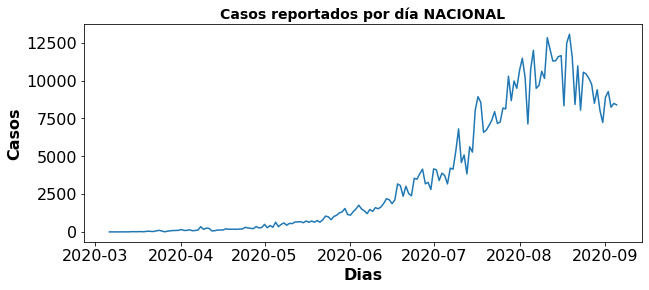

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(casos_dia_NAL['fecha_reporte_web'], casos_dia_NAL['Casos'] )

ax.set_title('Casos reportados por d√≠a NACIONAL', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Dias', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Casos', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

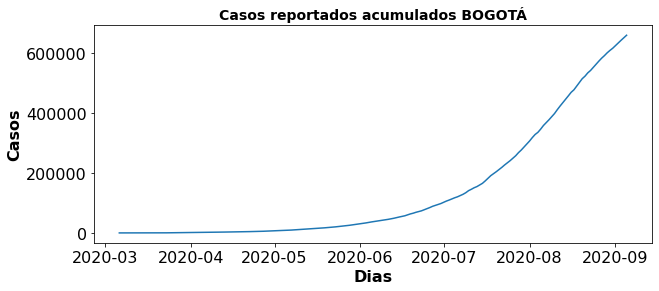

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(casos_dia_NAL['fecha_reporte_web'], casos_dia_NAL['Casos_acumulados'] )

ax.set_title('Casos reportados acumulados BOGOT√Å', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Dias', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Casos', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

####Bogot√°

In [ ]:
#BOGOT√Å
## COMPUTAMOS LOS CASOS POR D√çA Y ACUMULADOS DESDE EL INICIO DE LA PANDEMIA:
casos_dia_BOG = casos_imp.copy()
casos_dia_BOG= casos_dia_BOG[casos_dia_BOG['Ciudad_de_ubicaci√≥n'].isin(['Bogot√° D.C.'])]
casos_dia_BOG['Casos']=1
casos_dia_BOG = casos_dia_BOG.groupby('fecha_reporte_web')['Casos'].sum().reset_index()
casos_dia_BOG['Casos_acumulados'] = casos_dia_BOG['Casos'].cumsum()
#casos_dia_BOG

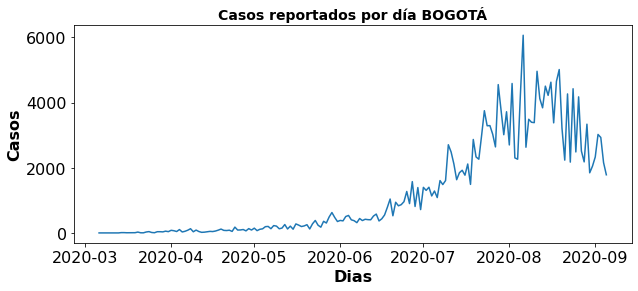

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(casos_dia_BOG['fecha_reporte_web'], casos_dia_BOG['Casos'] )

ax.set_title('Casos reportados por d√≠a BOGOT√Å', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Dias', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Casos', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

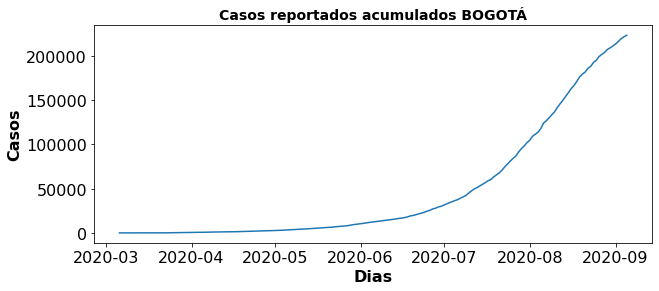

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(casos_dia_BOG['fecha_reporte_web'], casos_dia_BOG['Casos_acumulados'] )

ax.set_title('Casos reportados acumulados BOGOT√Å', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Dias', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Casos', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

####Medell√≠n

In [ ]:
#MEDELL√çN
## COMPUTAMOS LOS CASOS POR D√çA Y ACUMULADOS DESDE EL INICIO DE LA PANDEMIA:
casos_dia_MED = casos_imp.copy()
casos_dia_MED= casos_dia_MED[casos_dia_MED['Ciudad_de_ubicaci√≥n'].isin(['Medell√≠n'])]
casos_dia_MED['Casos']=1
casos_dia_MED = casos_dia_MED.groupby('fecha_reporte_web')['Casos'].sum().reset_index()
casos_dia_MED['Casos_acumulados'] = casos_dia_MED['Casos'].cumsum()
#casos_dia_MED

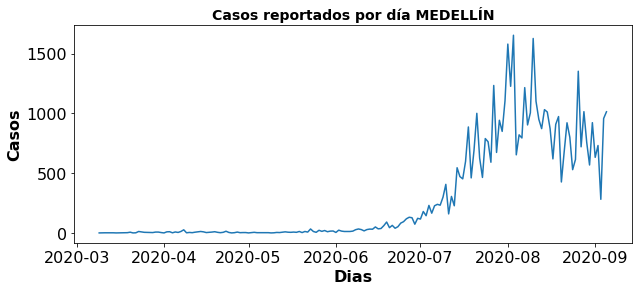

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(casos_dia_MED['fecha_reporte_web'], casos_dia_MED['Casos'] )

ax.set_title('Casos reportados por d√≠a MEDELL√çN', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Dias', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Casos', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

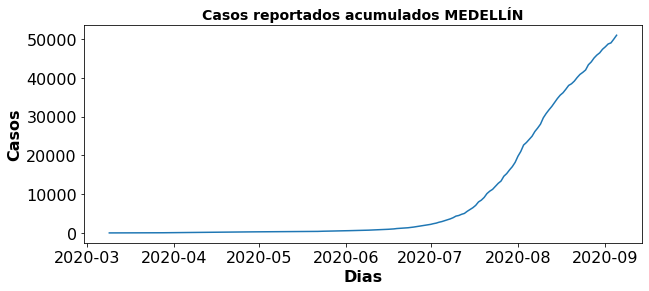

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(casos_dia_MED['fecha_reporte_web'], casos_dia_MED['Casos_acumulados'] )

ax.set_title('Casos reportados acumulados MEDELL√çN', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Dias', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Casos', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

####Cali

In [ ]:
#CALI
## COMPUTAMOS LOS CASOS POR D√çA Y ACUMULADOS DESDE EL INICIO DE LA PANDEMIA:
casos_dia_CAL = casos_imp.copy()
casos_dia_CAL= casos_dia_CAL[casos_dia_CAL['Ciudad_de_ubicaci√≥n'].isin(['Cali'])]
casos_dia_CAL['Casos']=1
casos_dia_CAL = casos_dia_CAL.groupby('fecha_reporte_web')['Casos'].sum().reset_index()
casos_dia_CAL['Casos_acumulados'] = casos_dia_CAL['Casos'].cumsum()
casos_dia_CAL

fecha_reporte_web  Casos  Casos_acumulados
0          2020-03-13      1                 1
1          2020-03-16      2                 3
2          2020-03-17      5                 8
3          2020-03-20      1                 9
4          2020-03-21      6                15
..                ...    ...               ...
167        2020-09-01    564             37427
168        2020-09-02    382             37809
169        2020-09-03    261             38070
170        2020-09-04    396             38466
171        2020-09-05    421             38887

[172 rows x 3 columns]

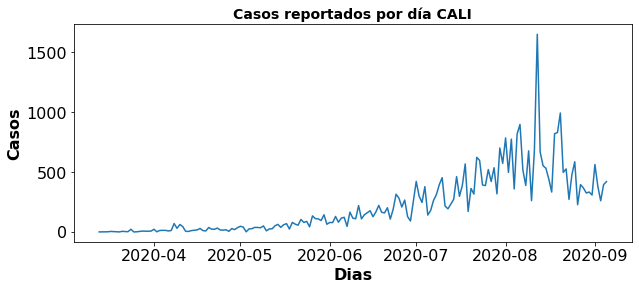

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(casos_dia_CAL['fecha_reporte_web'], casos_dia_CAL['Casos'] )

ax.set_title('Casos reportados por d√≠a CALI', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Dias', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Casos', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

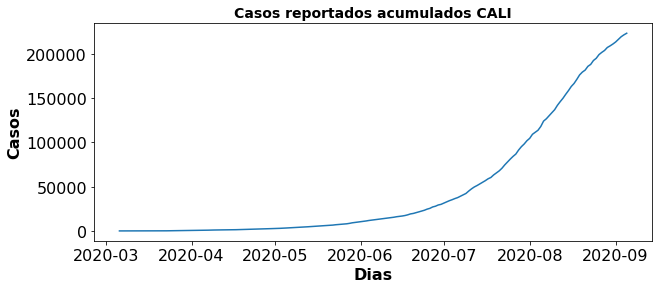

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(casos_dia_BOG['fecha_reporte_web'], casos_dia_BOG['Casos_acumulados'] )

ax.set_title('Casos reportados acumulados CALI', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Dias', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Casos', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

####Barranquilla

In [ ]:
#BARRANQUILLA
## COMPUTAMOS LOS CASOS POR D√çA Y ACUMULADOS DESDE EL INICIO DE LA PANDEMIA:
casos_dia_BAQ = casos_imp.copy()
casos_dia_BAQ= casos_dia_BAQ[casos_dia_BAQ['Ciudad_de_ubicaci√≥n'].isin(['Barranquilla'])]
casos_dia_BAQ['Casos']=1
casos_dia_BAQ = casos_dia_BAQ.groupby('fecha_reporte_web')['Casos'].sum().reset_index()
casos_dia_BAQ['Casos_acumulados'] = casos_dia_BAQ['Casos'].cumsum()
#casos_dia_BAQ

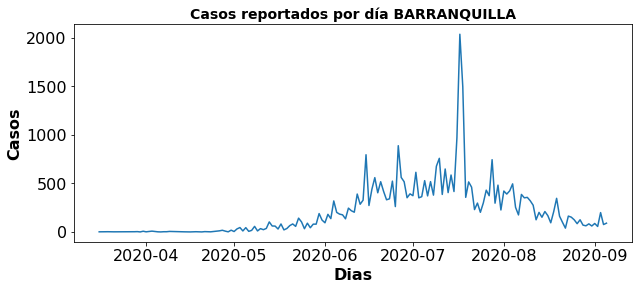

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(casos_dia_BAQ['fecha_reporte_web'], casos_dia_BAQ['Casos'] )

ax.set_title('Casos reportados por d√≠a BARRANQUILLA', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Dias', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Casos', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

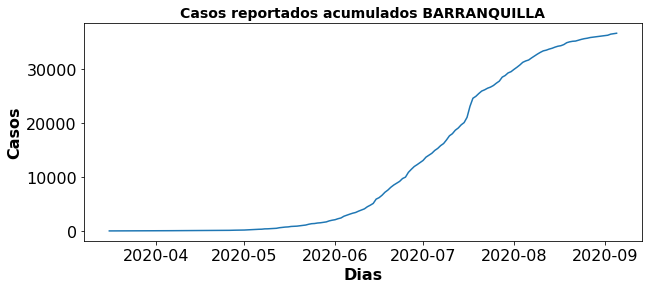

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(casos_dia_BAQ['fecha_reporte_web'], casos_dia_BAQ['Casos_acumulados'] )

ax.set_title('Casos reportados acumulados BARRANQUILLA', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Dias', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Casos', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

####Cartagena

In [ ]:
#CARTAGENA
## COMPUTAMOS LOS CASOS POR D√çA Y ACUMULADOS DESDE EL INICIO DE LA PANDEMIA:
casos_dia_CAR = casos_imp.copy()
casos_dia_CAR= casos_dia_CAR[casos_dia_CAR['Ciudad_de_ubicaci√≥n'].isin(['Cartagena de Indias'])]
casos_dia_CAR['Casos']=1
casos_dia_CAR = casos_dia_CAR.groupby('fecha_reporte_web')['Casos'].sum().reset_index()
casos_dia_CAR['Casos_acumulados'] = casos_dia_CAR['Casos'].cumsum()
#casos_dia_CAR

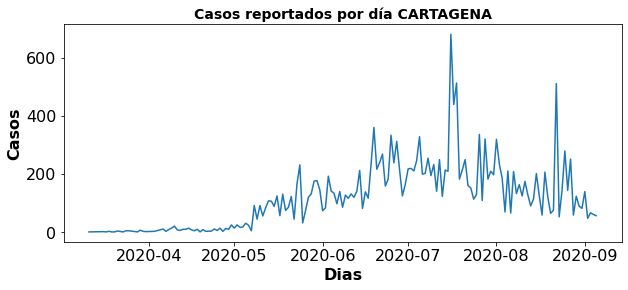

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(casos_dia_CAR['fecha_reporte_web'], casos_dia_CAR['Casos'] )

ax.set_title('Casos reportados por d√≠a CARTAGENA', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Dias', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Casos', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

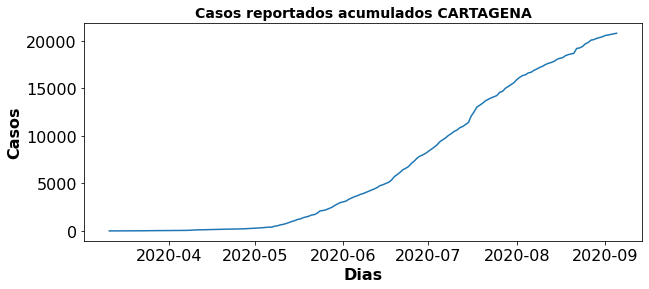

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(casos_dia_CAR['fecha_reporte_web'], casos_dia_CAR['Casos_acumulados'] )

ax.set_title('Casos reportados acumulados CARTAGENA', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Dias', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Casos', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

# MODELO

El modelo desarrollado es un modelo h√≠brido con enfoque determin√≠stico. Para ello se realizan combinatorias de un modelo de corto plazo y uno de mediano-largo plazo. Para el corto plazo se pronostica con un modelo **ARIMA**-Seasoned que, dado el comportamiento irregular del n√∫mero de casos reportados, activos, recuperados y fallecidos, capta posibles un posible aumento o disminuci√≥n de acuerdo al n√∫mero de casos. 

Este se ir√° mezclando paulatinamente con un modelo de mediano-largo plazo como el **SIR**, dado que el primero presenta un error significativo cuando tiende al largo plazo. De esta manera, se obtendr√° para cada ciudad un pron√≥stico soportado en ambos modelos, integrando la autocorrecci√≥n a partir de nuevos datos.


## MODELO SIR



El modelo SIR, es un modelo de tipo compartimental ampliamente usado en el estudio del comportamiento de fen√≥menos epidemiol√≥gicos. Este clasifica la poblaci√≥n en tres grupos Susceptibles (S), Infectados (I)  y recuperados (R), evaluando las interacciones entre estos modelos y tomando como principales par√°metros de entrada el n√∫mero de individuos en la poblaci√≥n y la tasa de contagio. De acuerdo a lo anterior se evidencia que al tener un historico de datos suficiente para comprender la historia natural de la enfermedad, se podr√°n adelantar acercamientos que permitan predecir su comportamiento en diferentes ventanas de tiempo.

Este modelo en su forma est√°ndar realiza un fuerte supuesto, dado que asume que la poblaci√≥n pasar√° por cada grupo en alg√∫n momento del ciclo de vida del virus, es decir que se superar√° a partir de lo que los epidemi√≥logos llaman 'inmunidad de reba√±o'

Sin embargo, las evidencias constatan que la tasa de infecci√≥n y la posibilidad de contar con una vacuna entre el mediano y largo plazo, hace d√©bil la hipotesis de que el virus llegue a todos los individuos de la poblaci√≥n.

***


## ARIMA

Autoregressive Integrated Moving Average


(p, d,q): p, d t q son enteros no negativos.

Los par√°metros tienen su significado habitual, aqu√≠, p representa el orden de autoregresi√≥n, d representa el
grado de diferencia de tendencia (el n√∫mero de veces que se han restado valores pasados ‚Äã‚Äãa los datos) para el
estacionario de la tendencia y q significa el orden de la media m√≥vil. Este modelo combina la regresi√≥n autom√°tica
se retrasa por debajo de la tendencia estacionaria y la media m√≥vil y predice mejores valores futuros basados ‚Äã‚Äãen
datos recientes. Para este modelo, el grado de los par√°metros p, d y q se determinan con base en el gr√°fico de la funci√≥n de autocorrelaci√≥n parcial.
 (PACF), la prueba Dickey-Fuller aumentada para probar el estacionario del tiempo.
observaciones en serie y el gr√°fico de la funci√≥n de autocorrelaci√≥n completa (ACF) respectivamente.


ùê¥ùëÖùêºùëÄA (ùëù, d, q): ùëãùë°=ùõº1 ùëãùë° ‚àí1+ùõº2 ùëãùë° ‚àí2+ùõΩ1ùëçùë°‚àí1 ùõΩ2 ùëçùë° ‚àí2+ ùëçt 

Where, ùëçùë° =ùëãùë°‚àíùëãùë°‚àí1


Aqu√≠, Xt es el n√∫mero previsto de casos de COVID-19 activos y confirmados en el d√≠a t; Œ±1, Œ±2, Œ≤1 y Œ≤2
son par√°metros mientras que Zt es el t√©rmino residual para el d√≠a t.
La tendencia de las pr√≥ximas incidencias se puede estimar a partir de los casos anteriores y un an√°lisis de series de tiempo
se realiza para este prop√≥sito


AR: Auto regresiva.

MA: Media movil (Movil average)

1. Auto regresiva:
Para la parte autoregresiva es necesario definir si el conjunto de datos de covid presentan un comportamiento estacional o no. En el caso que se ponga de supuesto la no-estacionalidad de los datos, se aplicar√° el modelo ARIMA, siguiendo el modelo ARIMA(p, d, q).
En caso de tomar como supuesto la estacionalidad de los datos, se aplcar√° SARIMA (Seasoned ARIMA), siguiendo el modelo ARIMA(p,d,q)(P,D,Q)s, donde p,d y q son los parametros no estacionales del modelo y P,D Q, siguen la misma definici√≥n de las primeras tres variables pero esta vez aplicables al componente estacional de la serie de tiempo.

Respecto a p, suponemos la variable depende del valor rezagado inmediatamente anterior, por lo tanto tiene valor 1.

La parte integrada se refiere al orden de diferenciaci√≥n. El orden de diferenciaci√≥n no estacional se denota por d y el orden de diferenciaci√≥n estacional por D. La parte integrada es esencial cuando la serie es no estacionaria.
Para este caso supondremos que es no estacionaria, por lo que d tendr√≠a un valor de 1

In [ ]:
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# reindexar el dataframe para los datos de Cartagena.
datos_arima_CAR = casos_dia_CAR.copy()
datos_arima_CAR['fecha_reporte_web'] = pd.to_datetime(datos_arima_CAR['fecha_reporte_web'])
datos_arima_CAR.set_index(['fecha_reporte_web'],inplace=True)
datos_arima_CAR = datos_arima_CAR[['Casos']]

In [ ]:
# reindexar el dataframe para los datos de Barranquilla.
datos_arima_BAQ = casos_dia_BAQ.copy()
datos_arima_BAQ['fecha_reporte_web'] = pd.to_datetime(datos_arima_BAQ['fecha_reporte_web'])
datos_arima_BAQ.set_index(['fecha_reporte_web'],inplace=True)
datos_arima_BAQ = datos_arima_BAQ[['Casos']]

In [ ]:
# reindexar el dataframe para los datos de Cali.
datos_arima_CAL = casos_dia_CAL.copy()
datos_arima_CAL['fecha_reporte_web'] = pd.to_datetime(datos_arima_CAL['fecha_reporte_web'])
datos_arima_CAL.set_index(['fecha_reporte_web'],inplace=True)
datos_arima_CAL = datos_arima_CAL[['Casos']]

In [ ]:
# reindexar el dataframe para los datos de Medell√≠n.
datos_arima_MED = casos_dia_MED.copy()
datos_arima_MED['fecha_reporte_web'] = pd.to_datetime(datos_arima_MED['fecha_reporte_web'])
datos_arima_MED.set_index(['fecha_reporte_web'],inplace=True)
datos_arima_MED = datos_arima_MED[['Casos']]

In [ ]:
# reindexar el dataframe para los datos de Bogot√°.
datos_arima_BOG = casos_dia_BOG.copy()
datos_arima_BOG['fecha_reporte_web'] = pd.to_datetime(datos_arima_BOG['fecha_reporte_web'])
datos_arima_BOG.set_index(['fecha_reporte_web'],inplace=True)
datos_arima_BOG = datos_arima_BOG[['Casos']]

In [ ]:
# reindexar el dataframe para los datos nacionales.
datos_arima_NAL = casos_dia_NAL.copy()
datos_arima_NAL['fecha_reporte_web'] = pd.to_datetime(datos_arima_NAL['fecha_reporte_web'])
datos_arima_NAL.set_index(['fecha_reporte_web'],inplace=True)
datos_arima_NAL = datos_arima_NAL[['Casos']]

## An√°lisis de Par√°metros ARIMA

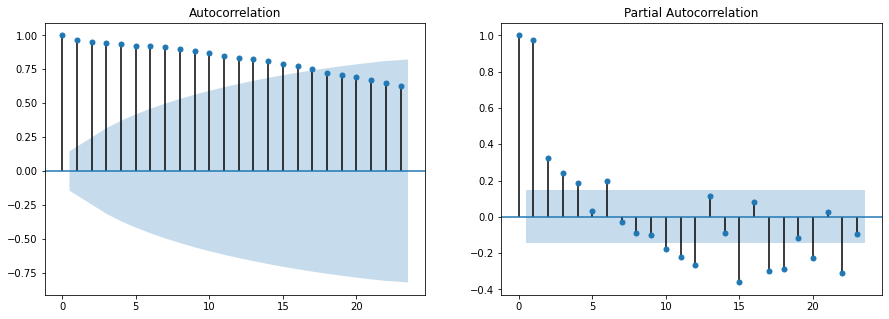

In [ ]:
## An√°lisis de autocorrelaci√≥n de los datos con una confianza del 95%.

fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(datos_arima_NAL, alpha=0.05, ax=ax[0]).show()
plot_pacf(datos_arima_NAL,  alpha=0.05, ax=ax[1]).show()
plt.show()

Los analisis realizados sobre gr√°ficos de autocorrelaci√≥n y autocorrelaci√≥n parcial generados para cada set de datos sirvieron de soporte para la escogencia de los par√°metros de entrada del modelo ARIMA.

As√≠ mismo de la herramienta autoarima, con la cual se analizaba la combinaci√≥n que de acuerdo a cada set de datos, permitia minimizar el criterio de informaci√≥n de Akaike AIC, el cual, a pesar de no medir la calidad del modelo en t√©rminos de la predictibilidad, da cuenta de un nivel de ajuste.

In [ ]:
## Training rate.
TR=0.80

La serie no parece estacionaria, ya que muestra una tendencia creciente. Tendremos que hacer diferenciaci√≥n de datos para hacer estacionaria la serie, integrada de orden 1, denotada por d (para diff), uno de los par√°metros del modelo ARIMA.

**Modelo SIR**

Para construir este modelo se tuvo en cuenta tres variables (Recuperados, Infectados y Casos Activos). Se entiende por casos activos aquellos que no se reportaron nunca como recuperados ni fallecidos.

Posterior a ello se defini√≥ un s_0 como la poblaci√≥n total tanto para Colombia como para las ciudades principales, un i_0 como los infectados iniciales y r_0 como los recuperados iniciales, respecto al beta y gamma el modelo est√° dise√±ado para que calcule los valores optimos.

Teniendo en cuenta que este modelo plantea que toda la poblaci√≥n es susceptible a infectarse se generan unos picos muy altos en alg√∫n momento del tiempo, por lo que se decidi√≥ plantear dos escenarios , uno a corto plazo (100 d√≠as) con el fin de identificar tendencias en los pr√≥ximos d√≠as y otro a largo plazo(1000 d√≠as) para conocer en qu√© punto del tiempo la pandemia llega al pico m√°s alto y empieza a descender.


In [ ]:
#Definir funciones

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.000001, 0.5), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Infectados actuales': extended_actual, 'Recuperados Actuales': extended_recovered, 'Susceptibles': prediction.y[0], 'Predicci√≥n Infectados': prediction.y[1], 'Predicci√≥n Recuperados': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(1,3,figsize=(14, 6))
    df.plot(ax=ax[0],title='Covid Colombia')
    df['Predicci√≥n Infectados'].plot(ax=ax[1],title='Predicci√≥n Infectados')
    df['Predicci√≥n Recuperados'].plot(ax=ax[2],title='Predicci√≥n Recuperados')
    print('El intervalo de confianza es:' , mean_confidence_interval(df['Predicci√≥n Infectados'], confidence=0.95))
    #plt.savefig('Imagen.png') - Para guardar la figura
    print(f"country=Colombia, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return df.tail(100)

###NACIONAL

#### Nacional SIR

In [ ]:
df3=df2.copy()
df3['Activos']= np.where(df3['cantidad_reporte'] - df3['cantidad_recuperados']- df3['cantidad_muertes']<0, 0, df3['cantidad_reporte']-df3['cantidad_recuperados']-df3['cantidad_muertes'])

data = df3.set_index('f_reporte')['Activos']
infected = df3.set_index('f_reporte')['cantidad_reporte']
recovered = df3.set_index('f_reporte')['cantidad_recuperados']

**Corto Plazo - 100 D√≠as**

      fun: 1353.8505747767726
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.10581971, -0.08765255])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 57
      nit: 8
   status: 0
  success: True
        x: array([0.07945428, 0.05774153])
El intervalo de confianza es: (7177.38734282147, 5967.743073749254, 8387.031611893686)
country=Colombia, beta=0.07945428, gamma=0.05774153, r_0:1.37603360


Infectados actuales  ... Predicci√≥n Recuperados
2020-09-06                None  ...           13335.063941
2020-09-07                None  ...           13632.273992
2020-09-08                None  ...           13935.998820
2020-09-09                None  ...           14246.371100
2020-09-10                None  ...           14563.525325
...                        ...  ...                    ...
2020-12-10                None  ...          105735.693188
2020-12-11                None  ...          108048.221758
2020-12-12                None  ...          110410.964510
2020-12-13                None  ...          112824.993640
2020-12-14                None  ...          115291.400795

[100 rows x 5 columns]

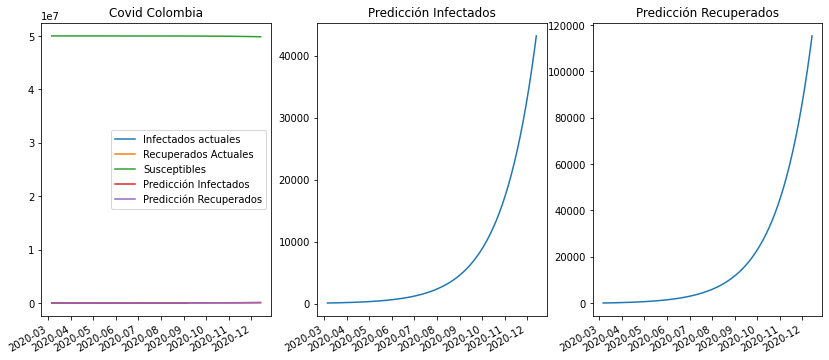

In [ ]:
#Poblacion inicial , infectados y recuperados
s_0 = 50000000
i_0 = 100
r_0 = 76
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('2020-09-06', periods=100))))) #Periodo a predecir

train(recovered, infected, data)

**Largo Plazo - 1000 D√≠as**

      fun: 1779.0251555080101
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([   1.25035058, -655.15787355])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 81
      nit: 10
   status: 0
  success: True
        x: array([0.44135828, 0.4       ])
El intervalo de confianza es: (19208.367486130814, 16327.584198176279, 22089.15077408535)
country=Colombia, beta=0.44135828, gamma=0.40000000, r_0:1.10339571


Infectados actuales  ... Predicci√≥n Recuperados
2023-02-23                None  ...           9.074725e+06
2023-02-24                None  ...           9.074725e+06
2023-02-25                None  ...           9.074725e+06
2023-02-26                None  ...           9.074725e+06
2023-02-27                None  ...           9.074725e+06
...                        ...  ...                    ...
2023-05-29                None  ...           9.074725e+06
2023-05-30                None  ...           9.074725e+06
2023-05-31                None  ...           9.074725e+06
2023-06-01                None  ...           9.074725e+06
2023-06-02                None  ...           9.074725e+06

[100 rows x 5 columns]

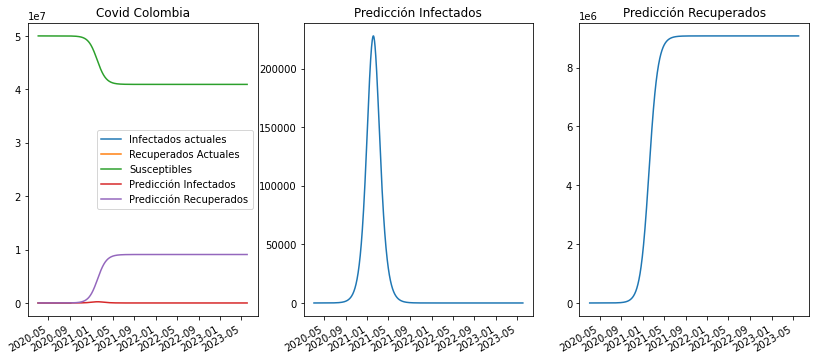

In [ ]:
#Poblacion inicial , infectados y recuperados
s_0 = 50000000
i_0 = 1
r_0 = 0.7
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('2020-09-06', periods=1000))))) #Periodo a predecir

train(recovered, infected, data)

#### Nacional ARIMA

Reindexar los datos para cada ciudad.

In [ ]:
#Actualizo el df temporal con la ciudad.
datos_arima_XX = datos_arima_NAL.copy()
## Separo los valores entre train y test.
train_size = int(len(datos_arima_XX) * 0.75)
test_size = len(datos_arima_XX) - train_size
train_data, test_data = datos_arima_XX[0:train_size], datos_arima_XX[train_size:]

In [ ]:
auto_arima(train_data, seasonal=True, m=22,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  135
Model:             SARIMAX(2, 1, 4)x(0, 1, [], 22)   Log Likelihood                -836.064
Date:                             Mon, 07 Sep 2020   AIC                           1686.127
Time:                                     03:56:20   BIC                           1705.157
Sample:                                          0   HQIC                          1693.848
                                             - 135                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2585      0.051     24.517      0.000       1.158       1.359
ar.L2         -1.0000      0.046    -21.682      0.000      -1.090      -0.910
ma.L1         -2.0672      0.105    -19.691      0.000      -2.273      -1.861
ma.L2          2.3687      0.182     12.988      0.000       2.011       2.726
ma.L3         -1.4373      0.166     -8.672      0.000      -1.762      -1.112
ma.L4          0.4717      0.092      5.110      0.000       0.291       0.653
sigma2      1.745e+05   1.93e+04      9.034      0.000    1.37e+05    2.12e+05
===================================================================================
Ljung-Box (Q):                       31.51   Jarque-Bera (JB):                45.32
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):              37.27   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train

In [ ]:
# ESTABLEZCO EL TAMA√ëO ESTACIONAL QUE DE ACUERDO A LOS DATOS DE 'TEST' DISMINUYA EL ERROR ABSOLUTO PROMEDIO.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
## Generar los par√°metros del ARIMA, a partir del train data.
MAE = []
for x in range(15, 26):
  mod = sm.tsa.statespace.SARIMAX(train_data['Casos'],
                                  order=(0, 1, 2),
                                  seasonal_order=(0, 1, 1, x),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

  results = mod.fit()

  ## Genero las predicciones.
  arima_pred = results.predict(start = len(train_data)+1, end = len(datos_arima_XX) , dynamic=False, typ="levels").rename("Pronostico")

  ## Genero la lista de dias para indexar el df 'arima_pred'.
  dateList = []
  dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred))]

  ## Convierto la serie en df y pongo la fecha como index
  arima_pred = pd.DataFrame(data=arima_pred, columns=['Pronostico'])
  arima_pred['fecha_reporte_web'] = dateList
  arima_pred = arima_pred.set_index(['fecha_reporte_web'])

  ## Creo df para comparar train y test.
  metric_df = arima_pred.join(datos_arima_XX['Casos'])
  metric_df.dropna(inplace=True)
  
  MAE.append([x, mean_absolute_error(metric_df.Casos, metric_df.Pronostico)])
minMAE = pd.DataFrame(MAE,columns=['Tama√±o_estac','Error'])
E = minMAE['Tama√±o_estac'].loc[minMAE['Error'].idxmin()]


In [ ]:
## Generar los par√°metros del ARIMA, a partir del train data.
mod = sm.tsa.statespace.SARIMAX(train_data['Casos'],
                                order=(0, 1, 2),
                                seasonal_order=(0, 1, 1, E),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3361      0.047     -7.139      0.000      -0.428      -0.244
ma.L2         -0.2203      0.078     -2.827      0.005      -0.373      -0.068
ma.S.L17      -0.7173      0.198     -3.629      0.000      -1.105      -0.330
sigma2      3.713e+05   3.17e+04     11.719      0.000    3.09e+05    4.33e+05


 Test


In [ ]:
## Genero las predicciones.
arima_pred = results.predict(start = len(train_data)+1, end = len(datos_arima_XX) , dynamic=False, typ="levels").rename("Pronostico")

## Genero la lista de dias para indexar el df 'arima_pred'
dateList = []
dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred))]

## Convierto la serie en df y pongo la fecha como index
arima_pred = pd.DataFrame(data=arima_pred, columns=['Pronostico'])
arima_pred['fecha_reporte_web'] = dateList
#casos['fecha_reporte_web'] = pd.to_datetime(casos['fecha_reporte_web']) #Convertir a fecha
arima_pred = arima_pred.set_index(['fecha_reporte_web'])


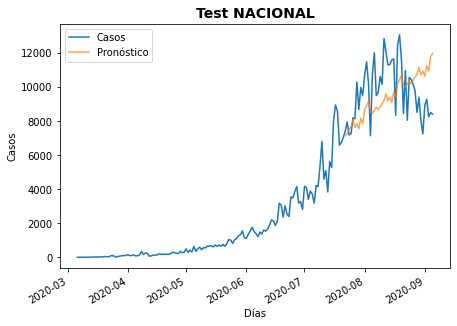

In [ ]:
ax = datos_arima_XX['2020':].plot(label='Reales',figsize=(7, 5))
arima_pred['Pronostico'].plot(ax=ax, label='Pron√≥stico', alpha=.7)

conf_int = 2 * arima_pred.std()

#plt.fill_between(conf_int.index, 
#                 arima_pred-conf_int, 
#                 arima_pred+conf_int, 
#                 color='b', alpha=.1)
ax.set_title('Test NACIONAL', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.legend()

plt.show()

In [ ]:
## Creo df para comparar train y test.
metric_df = arima_pred.join(datos_arima_XX['Casos'])
metric_df.dropna(inplace=True)

In [ ]:
r2_score(metric_df['Casos'], metric_df["Pronostico"])

-0.46126661226363175

In [ ]:
prophet_rmse_error = rmse(metric_df['Casos'], metric_df["Pronostico"])
prophet_mse_error = prophet_rmse_error**2

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}')

MSE Error: 3857156.092957291
RMSE Error: 1963.9643817944589


In [ ]:
mean_absolute_error(metric_df.Casos, metric_df.Pronostico)

1692.9009069250985

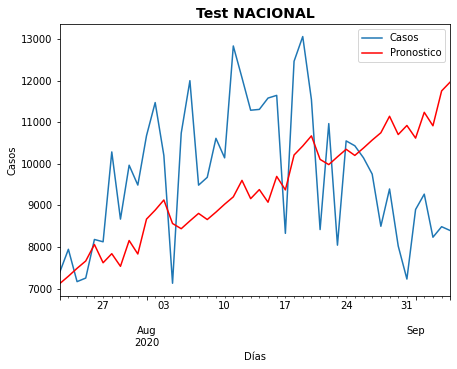

In [ ]:
ax=test_data.plot(legend=True, figsize=(7,5))
arima_pred.plot(ax=ax,legend = True, color='red')
ax.set_title('Test NACIONAL', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.show()


Generalizaci√≥n

In [ ]:
last_day = 100    ##Cantidad de dias a predecir.

In [ ]:
## Genero las predicciones.
arima_pred_NAL = results.predict(start = len(train_data)+1, end = len(train_data)+1+last_day , typ="levels").rename("Pronostico")

## Genero la lista de dias para indexar el df 'arima_pred'
dateList = []
dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred_NAL))]

## Convierto la serie en df y pongo la fecha como index
arima_pred_NAL = pd.DataFrame(data=arima_pred_NAL, columns=['Pronostico'])
arima_pred_NAL['fecha_reporte_web'] = dateList
arima_pred_NAL = arima_pred_NAL.set_index(['fecha_reporte_web'])


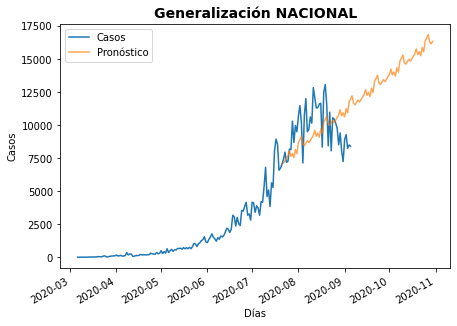

In [ ]:
ax = datos_arima_XX['2020':].plot(label='Reales',figsize=(7, 5))
arima_pred_NAL['Pronostico'].plot(ax=ax, label='Pron√≥stico', alpha=.7)

#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_title('Generalizaci√≥n NACIONAL', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.legend()

plt.show()

###BOGOT√Å

####Bogot√° D.C. SIR

In [ ]:
casos_dia_SIR_BOG = casos_imp_SIR.copy()
casos_dia_SIR_BOG= casos_dia_SIR_BOG[casos_dia_SIR_BOG['Ciudad_de_ubicaci√≥n'].isin(['Bogot√° D.C.'])]
dff=casos_dia_SIR_BOG.copy()
ff_reporte=pd.DataFrame()
ff_reporte['cantidad_reporte']=dff.groupby('fecha_reporte_web').size()
ff_reporte['f_reporte']=ff_reporte.index
Dff1=dff[dff['atenci√≥n'] == 'Fallecido']
ff_muerte=pd.DataFrame()
ff_muerte['cantidad_muertes']=Dff1.groupby('Fecha_de_muerte').size()
ff_muerte['f_muerte']=ff_muerte.index
Dff2=dff[dff['atenci√≥n'] == 'Recuperado']
ff_recuperado=pd.DataFrame()
ff_recuperado['cantidad_recuperados']=Dff2.groupby('Fecha_recuperado').size()
ff_recuperado['f_recuperados']=ff_recuperado.index
consf1=pd.merge(ff_reporte, ff_muerte, left_on='f_reporte', right_on='f_muerte', how='left')
consf=pd.merge(consf1, ff_recuperado, left_on='f_reporte', right_on='f_recuperados', how='left')
cols1 = ['f_reporte', 'cantidad_reporte','cantidad_recuperados','cantidad_muertes']
dff1=consf[cols1]
dff2 = dff1.fillna(0)
dff3=dff2.copy()
dff3['Activos']=abs(dff3['cantidad_reporte']-dff3['cantidad_recuperados']-dff3['cantidad_muertes'])
data = dff3.set_index('f_reporte')['Activos']
infected = dff3.set_index('f_reporte')['cantidad_reporte']
recovered = dff3.set_index('f_reporte')['cantidad_recuperados']

**Corto Plazo - 100 D√≠as**

      fun: 750.7730084907704
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00844693, 0.00251248])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 78
      nit: 11
   status: 0
  success: True
        x: array([0.04558199, 0.02700955])
El intervalo de confianza es: (3411.4752972890997, 2900.241823701551, 3922.7087708766485)
country=Colombia, beta=0.04558199, gamma=0.02700955, r_0:1.68762520


Infectados actuales  ... Predicci√≥n Recuperados
2020-09-06                None  ...            4042.311344
2020-09-07                None  ...            4119.128684
2020-09-08                None  ...            4197.380497
2020-09-09                None  ...            4277.095005
2020-09-10                None  ...            4358.300987
...                        ...  ...                    ...
2020-12-10                None  ...           23809.844585
2020-12-11                None  ...           24254.667390
2020-12-12                None  ...           24707.698769
2020-12-13                None  ...           25169.081260
2020-12-14                None  ...           25638.959168

[100 rows x 5 columns]

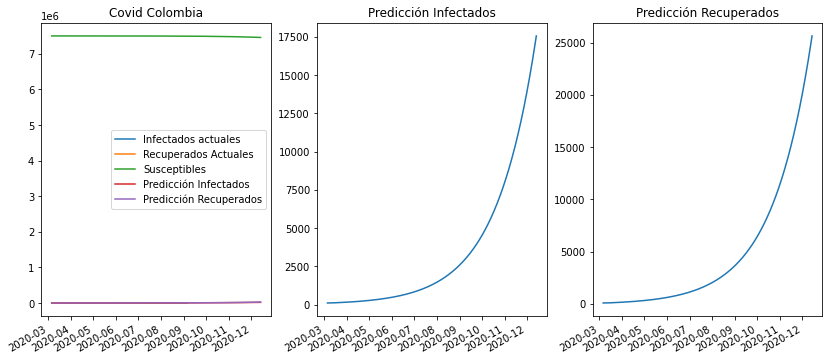

In [ ]:
s_0 = 7500000
i_0 = 100
r_0 = 76
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('2020-09-06', periods=100))))) # D√≠as a predecir Bogot√°
train(recovered, infected, data)

**Largo Plazo - 1000 D√≠as**

      fun: 765.1553629872499
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.37101039e-02, -1.15765192e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 189
      nit: 34
   status: 0
  success: True
        x: array([0.43398774, 0.4       ])
El intervalo de confianza es: (2422.3480566979706, 2097.3836262848736, 2747.3124871110676)
country=Colombia, beta=0.43398774, gamma=0.40000000, r_0:1.08496936


Infectados actuales  ... Predicci√≥n Recuperados
2023-02-23                None  ...           1.143391e+06
2023-02-24                None  ...           1.143391e+06
2023-02-25                None  ...           1.143391e+06
2023-02-26                None  ...           1.143391e+06
2023-02-27                None  ...           1.143391e+06
...                        ...  ...                    ...
2023-05-29                None  ...           1.143391e+06
2023-05-30                None  ...           1.143391e+06
2023-05-31                None  ...           1.143391e+06
2023-06-01                None  ...           1.143391e+06
2023-06-02                None  ...           1.143391e+06

[100 rows x 5 columns]

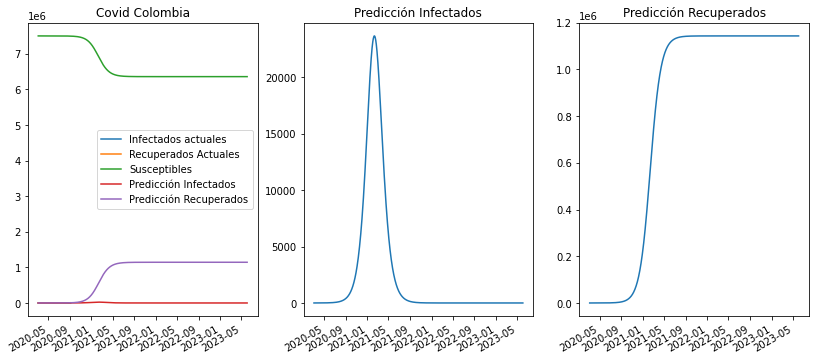

In [ ]:
s_0 = 7500000
i_0 = 1
r_0 = 0.76
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('2020-09-06', periods=1000))))) # D√≠as a predecir Bogot√°
train(recovered, infected, data)

#### Bogot√° ARIMA

In [ ]:
#Actualizo el df temporal con la ciudad.
datos_arima_XX = datos_arima_BOG.copy()
## Separo los valores entre train y test.
train_size = int(len(datos_arima_XX) * 0.75)
test_size = len(datos_arima_XX) - train_size
train_data, test_data = datos_arima_XX[0:train_size], datos_arima_XX[train_size:]

Train

In [ ]:
# ESTABLEZCO EL TAMA√ëO ESTACIONAL QUE DE ACUERDO A LOS DATOS DE 'TEST' DISMINUYA EL ERROR ABSOLUTO PROMEDIO.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
## Generar los par√°metros del ARIMA, a partir del train data.
MAE = []
for x in range(15, 26):
  mod = sm.tsa.statespace.SARIMAX(train_data['Casos'],
                                  order=(1, 2, 2),
                                  seasonal_order=(1, 1, 1, x),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

  results = mod.fit()

  ## Genero las predicciones.
  arima_pred = results.predict(start = len(train_data)+1, end = len(datos_arima_XX) , dynamic=False, typ="levels").rename("Pronostico")

  ## Genero la lista de dias para indexar el df 'arima_pred'.
  dateList = []
  dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred))]

  ## Convierto la serie en df y pongo la fecha como index
  arima_pred = pd.DataFrame(data=arima_pred, columns=['Pronostico'])
  arima_pred['fecha_reporte_web'] = dateList
  arima_pred = arima_pred.set_index(['fecha_reporte_web'])

  ## Creo df para comparar train y test.
  metric_df = arima_pred.join(datos_arima_XX['Casos'])
  metric_df.dropna(inplace=True)
  
  MAE.append([x, mean_absolute_error(metric_df.Casos, metric_df.Pronostico)])
minMAE = pd.DataFrame(MAE,columns=['Tama√±o_estac','Error'])
E = minMAE['Tama√±o_estac'].loc[minMAE['Error'].idxmin()]


In [ ]:
## Generar los par√°metros del ARIMA, a partir del train data.
mod = sm.tsa.statespace.SARIMAX(train_data['Casos'],
                                order=(1, 2, 2),
                                seasonal_order=(1, 1, 1, E),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3611      0.256     -1.408      0.159      -0.864       0.141
ma.L1         -1.2887      0.347     -3.709      0.000      -1.970      -0.608
ma.L2          0.2806      0.299      0.937      0.349      -0.306       0.868
ar.S.L24      -0.9583      0.254     -3.770      0.000      -1.457      -0.460
ma.S.L24      -0.2509      0.382     -0.656      0.512      -1.000       0.498
sigma2      6.889e+04   1.29e+04      5.340      0.000    4.36e+04    9.42e+04


 Test


In [ ]:
## Genero las predicciones.
arima_pred = results.predict(start = len(train_data)+1, end = len(datos_arima_XX) , dynamic=False, typ="levels").rename("Pronostico")

## Genero la lista de dias para indexar el df 'arima_pred'
dateList = []
dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred))]

## Convierto la serie en df y pongo la fecha como index
arima_pred = pd.DataFrame(data=arima_pred, columns=['Pronostico'])
arima_pred['fecha_reporte_web'] = dateList
#casos['fecha_reporte_web'] = pd.to_datetime(casos['fecha_reporte_web']) #Convertir a fecha
arima_pred = arima_pred.set_index(['fecha_reporte_web'])


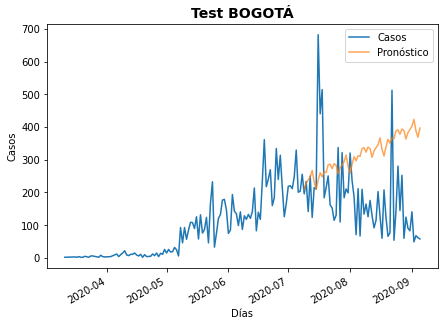

In [ ]:
ax = datos_arima_XX['2020':].plot(label='Reales',figsize=(7, 5))
arima_pred['Pronostico'].plot(ax=ax, label='Pron√≥stico', alpha=.7)

conf_int = 2 * arima_pred.std()

#plt.fill_between(conf_int.index, 
#                 arima_pred-conf_int, 
#                 arima_pred+conf_int, 
#                 color='b', alpha=.1)
ax.set_title('Test BOGOT√Å', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.legend()

plt.show()

In [ ]:
## Creo df para comparar train y test.
metric_df = arima_pred.join(datos_arima_XX['Casos'])
metric_df.dropna(inplace=True)


In [ ]:
r2_score(metric_df['Casos'], metric_df["Pronostico"])

-1.8463775712569994

In [ ]:
prophet_rmse_error = rmse(metric_df['Casos'], metric_df["Pronostico"])
prophet_mse_error = prophet_rmse_error**2

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}')

MSE Error: 2812210.450471731
RMSE Error: 1676.9646539124583


In [ ]:
mean_absolute_error(metric_df.Casos, metric_df.Pronostico)

1293.0022234842384

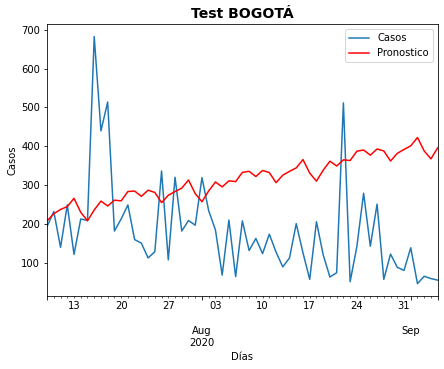

In [ ]:
ax=test_data.plot(legend=True, figsize=(7,5))
arima_pred.plot(ax=ax,legend = True, color='red')
ax.set_title('Test BOGOT√Å', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.show()


Generalizaci√≥n

In [ ]:
last_day = 100    ##Cantidad de dias a predecir.

In [ ]:
## Genero las predicciones.
arima_pred_BOG = results.predict(start = len(train_data)+1, end = len(train_data)+1+last_day , typ="levels").rename("Pronostico")

## Genero la lista de dias para indexar el df 'arima_pred'
dateList = []
dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred_BOG))]

## Convierto la serie en df y pongo la fecha como index
arima_pred_BOG = pd.DataFrame(data=arima_pred_BOG, columns=['Pronostico'])
arima_pred_BOG['fecha_reporte_web'] = dateList
arima_pred_BOG = arima_pred_BOG.set_index(['fecha_reporte_web'])


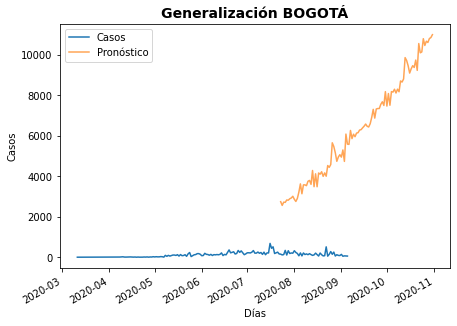

In [ ]:
ax = datos_arima_XX['2020':].plot(label='Reales',figsize=(7, 5))
arima_pred_BOG['Pronostico'].plot(ax=ax, label='Pron√≥stico', alpha=.7)

#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_title('Generalizaci√≥n BOGOT√Å', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.legend()

plt.show()

###MEDELL√çN

####Medell√≠n SIR

In [ ]:
casos_dia_SIR_MED = casos_imp_SIR.copy()
casos_dia_SIR_MED= casos_dia_SIR_MED[casos_dia_SIR_MED['Ciudad_de_ubicaci√≥n'].isin(['Medell√≠n'])]
dfff=casos_dia_SIR_MED.copy()
fff_reporte=pd.DataFrame()
fff_reporte['cantidad_reporte']=dfff.groupby('fecha_reporte_web').size()
fff_reporte['f_reporte']=fff_reporte.index
Dfff1=dfff[dfff['atenci√≥n'] == 'Fallecido']
fff_muerte=pd.DataFrame()
fff_muerte['cantidad_muertes']=Dfff1.groupby('Fecha_de_muerte').size()
fff_muerte['f_muerte']=fff_muerte.index
Dfff2=dfff[dfff['atenci√≥n'] == 'Recuperado']
fff_recuperado=pd.DataFrame()
fff_recuperado['cantidad_recuperados']=Dfff2.groupby('Fecha_recuperado').size()
fff_recuperado['f_recuperados']=fff_recuperado.index
cons1ff=pd.merge(fff_reporte, fff_muerte, left_on='f_reporte', right_on='f_muerte', how='left')
consff=pd.merge(cons1ff, fff_recuperado, left_on='f_reporte', right_on='f_recuperados', how='left')
cols1 = ['f_reporte', 'cantidad_reporte','cantidad_recuperados','cantidad_muertes']
dfff1=consff[cols1]
dfff2 = dfff1.fillna(0)
dfff3=dfff2.copy()
dfff3['Activos']=abs(dfff3['cantidad_reporte']-dfff3['cantidad_recuperados']-dfff3['cantidad_muertes'])
data = dfff3.set_index('f_reporte')['Activos']
infected = dfff3.set_index('f_reporte')['cantidad_reporte']
recovered = dfff3.set_index('f_reporte')['cantidad_recuperados']


**Corto Plazo - 100 D√≠as**

      fun: 210.82198929788538
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00998739, -0.00960654])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 81
      nit: 18
   status: 0
  success: True
        x: array([0.21940448, 0.18705767])
El intervalo de confianza es: (686.0481466972881, 537.8516852910163, 834.2446081035598)
country=Colombia, beta=0.21940448, gamma=0.18705767, r_0:1.17292427


Infectados actuales  ... Predicci√≥n Recuperados
2020-09-06                None  ...            1451.593435
2020-09-07                None  ...            1499.469205
2020-09-08                None  ...            1548.901438
2020-09-09                None  ...            1599.935824
2020-09-10                None  ...            1652.618914
...                        ...  ...                    ...
2020-12-10                None  ...           30258.554326
2020-12-11                None  ...           31213.302037
2020-12-12                None  ...           32196.631925
2020-12-13                None  ...           33209.275487
2020-12-14                None  ...           34252.089134

[100 rows x 5 columns]

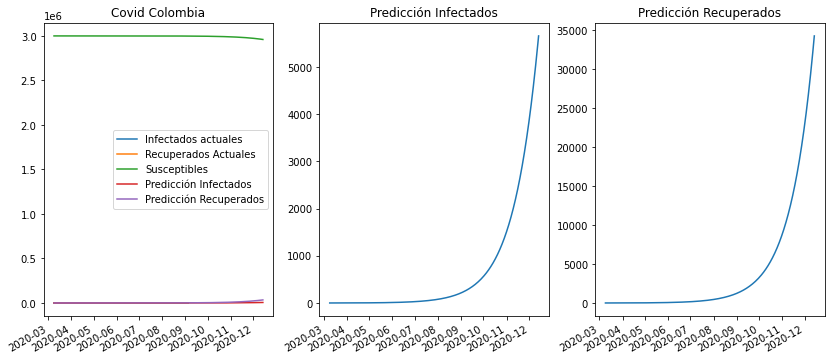

In [ ]:
s_0 = 3000000
i_0 = 1
r_0 = 0.7
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('2020-09-06', periods=100))))) #  months from 5th May
train(recovered, infected, data)

**Largo Plazo - 1000 D√≠as**

      fun: 210.82198929788538
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00998739, -0.00960654])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 81
      nit: 18
   status: 0
  success: True
        x: array([0.21940448, 0.18705767])
El intervalo de confianza es: (3831.125318780473, 3340.7791522081448, 4321.471485352802)
country=Colombia, beta=0.21940448, gamma=0.18705767, r_0:1.17292427


Infectados actuales  ... Predicci√≥n Recuperados
2023-02-23                None  ...          839214.359245
2023-02-24                None  ...          839214.359277
2023-02-25                None  ...          839214.359309
2023-02-26                None  ...          839214.359339
2023-02-27                None  ...          839214.359369
...                        ...  ...                    ...
2023-05-29                None  ...          839214.360317
2023-05-30                None  ...          839214.360319
2023-05-31                None  ...          839214.360321
2023-06-01                None  ...          839214.360322
2023-06-02                None  ...          839214.360324

[100 rows x 5 columns]

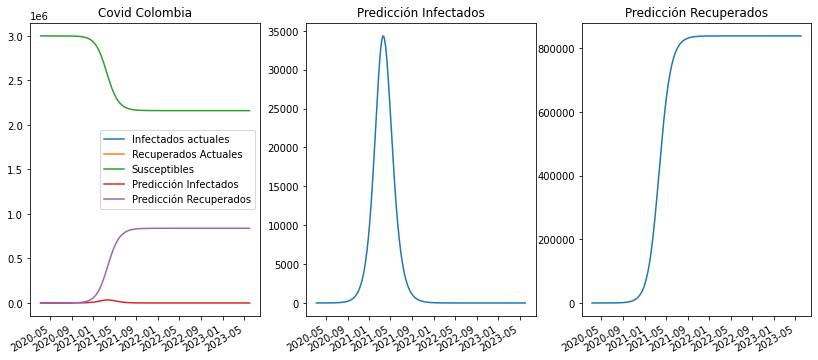

In [ ]:
s_0 = 3000000
i_0 = 1
r_0 = 0.7
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('2020-09-06', periods=1000))))) #  months from 5th May
train(recovered, infected, data)

#### Medell√≠n ARIMA

In [ ]:
#Actualizo el df temporal con la ciudad.
datos_arima_XX = datos_arima_MED.copy()
## Separo los valores entre train y test.
train_size = int(len(datos_arima_XX) * 0.85)
test_size = len(datos_arima_XX) - train_size
train_data, test_data = datos_arima_XX[0:train_size], datos_arima_XX[train_size:]

Train

In [ ]:
# ESTABLEZCO EL TAMA√ëO ESTACIONAL QUE DE ACUERDO A LOS DATOS DE 'TEST' DISMINUYA EL ERROR ABSOLUTO PROMEDIO.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
## Generar los par√°metros del ARIMA, a partir del train data.
MAE = []
for x in range(15, 26):
  mod = sm.tsa.statespace.SARIMAX(train_data['Casos'],
                                  order=(1, 2, 2),
                                  seasonal_order=(1, 1, 1, x),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

  results = mod.fit()

  ## Genero las predicciones.
  arima_pred = results.predict(start = len(train_data)+1, end = len(datos_arima_XX) , dynamic=False, typ="levels").rename("Pronostico")

  ## Genero la lista de dias para indexar el df 'arima_pred'.
  dateList = []
  dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred))]

  ## Convierto la serie en df y pongo la fecha como index
  arima_pred = pd.DataFrame(data=arima_pred, columns=['Pronostico'])
  arima_pred['fecha_reporte_web'] = dateList
  arima_pred = arima_pred.set_index(['fecha_reporte_web'])

  ## Creo df para comparar train y test.
  metric_df = arima_pred.join(datos_arima_XX['Casos'])
  metric_df.dropna(inplace=True)
  
  MAE.append([x, mean_absolute_error(metric_df.Casos, metric_df.Pronostico)])
minMAE = pd.DataFrame(MAE,columns=['Tama√±o_estac','Error'])
E = minMAE['Tama√±o_estac'].loc[minMAE['Error'].idxmin()]


In [ ]:
## Generar los par√°metros del ARIMA, a partir del train data.
mod = sm.tsa.statespace.SARIMAX(train_data['Casos'],
                                order=(1, 2, 2),
                                seasonal_order=(1, 1, 1, E),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1937      0.062      3.149      0.002       0.073       0.314
ma.L1         -1.9532      1.596     -1.224      0.221      -5.080       1.174
ma.L2          0.9994      1.633      0.612      0.540      -2.201       4.200
ar.S.L15      -0.7475      0.248     -3.014      0.003      -1.234      -0.261
ma.S.L15      -0.4811      0.203     -2.374      0.018      -0.878      -0.084
sigma2      2.325e+04   3.81e+04      0.611      0.541   -5.13e+04    9.78e+04


 Test


In [ ]:
## Genero las predicciones.
arima_pred = results.predict(start = len(train_data)+1, end = len(datos_arima_XX) , dynamic=False, typ="levels").rename("Pronostico")

## Genero la lista de dias para indexar el df 'arima_pred'
dateList = []
dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred))]

## Convierto la serie en df y pongo la fecha como index
arima_pred = pd.DataFrame(data=arima_pred, columns=['Pronostico'])
arima_pred['fecha_reporte_web'] = dateList
#casos['fecha_reporte_web'] = pd.to_datetime(casos['fecha_reporte_web']) #Convertir a fecha
arima_pred = arima_pred.set_index(['fecha_reporte_web'])


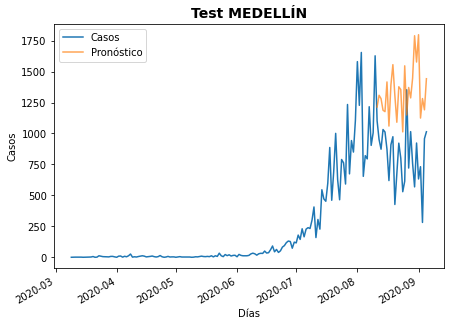

In [ ]:
ax = datos_arima_XX['2020':].plot(label='Reales',figsize=(7, 5))
arima_pred['Pronostico'].plot(ax=ax, label='Pron√≥stico', alpha=.7)

conf_int = 2 * arima_pred.std()

#plt.fill_between(conf_int.index, 
#                 arima_pred-conf_int, 
#                 arima_pred+conf_int, 
#                 color='b', alpha=.1)
ax.set_title('Test MEDELL√çN', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.legend()

plt.show()

In [ ]:
## Creo df para comparar train y test.
metric_df = arima_pred.join(datos_arima_XX['Casos'])
metric_df.dropna(inplace=True)

In [ ]:
r2_score(metric_df['Casos'], metric_df["Pronostico"])

-6.069463113249137

In [ ]:
prophet_rmse_error = rmse(metric_df['Casos'], metric_df["Pronostico"])
prophet_mse_error = prophet_rmse_error**2

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}')

MSE Error: 371133.2601553507
RMSE Error: 609.2070749386868


In [ ]:
mean_absolute_error(metric_df.Casos, metric_df.Pronostico)

533.2209269229038

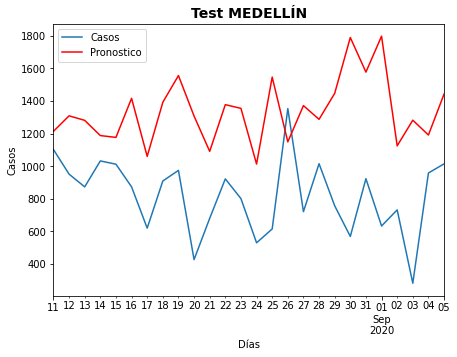

In [ ]:
ax=test_data.plot(legend=True, figsize=(7,5))
arima_pred.plot(ax=ax,legend = True, color='red')
ax.set_title('Test MEDELL√çN', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.show()


Generalizaci√≥n

In [ ]:
last_day = 100    ##Cantidad de dias a predecir.

In [ ]:
## Genero las predicciones.
arima_pred_MED = results.predict(start = len(train_data)+1, end = len(train_data)+1+last_day , typ="levels").rename("Pronostico")

## Genero la lista de dias para indexar el df 'arima_pred'
dateList = []
dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred_MED))]

## Convierto la serie en df y pongo la fecha como index
arima_pred_MED = pd.DataFrame(data=arima_pred_MED, columns=['Pronostico'])
arima_pred_MED['fecha_reporte_web'] = dateList
arima_pred_MED = arima_pred_MED.set_index(['fecha_reporte_web'])


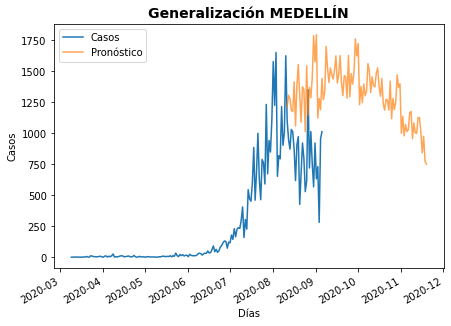

In [ ]:
ax = datos_arima_XX['2020':].plot(label='Reales',figsize=(7, 5))
arima_pred_MED['Pronostico'].plot(ax=ax, label='Pron√≥stico', alpha=.7)

#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_title('Generalizaci√≥n MEDELL√çN', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.legend()

plt.show()

###CALI

####Cali SIR

In [ ]:
casos_dia_SIR_CAL = casos_imp_SIR.copy()
casos_dia_SIR_CAL[casos_dia_SIR_CAL['Ciudad_de_ubicaci√≥n'].isin(['Cali'])]
dfc=casos_dia_SIR_CAL.copy()
fc_reporte=pd.DataFrame()
fc_reporte['cantidad_reporte']=dfc.groupby('fecha_reporte_web').size()
fc_reporte['f_reporte']=fc_reporte.index
Df1c=dfc[dfc['atenci√≥n'] == 'Fallecido']
fc_muerte=pd.DataFrame()
fc_muerte['cantidad_muertes']=Df1c.groupby('Fecha_de_muerte').size()
fc_muerte['f_muerte']=fc_muerte.index
Df2c=dfc[dfc['atenci√≥n'] == 'Recuperado']
fc_recuperado=pd.DataFrame()
fc_recuperado['cantidad_recuperados']=Df2c.groupby('Fecha_recuperado').size()
fc_recuperado['f_recuperados']=fc_recuperado.index
cons1c=pd.merge(fc_reporte, fc_muerte, left_on='f_reporte', right_on='f_muerte', how='left')
consc=pd.merge(cons1c, fc_recuperado, left_on='f_reporte', right_on='f_recuperados', how='left')
cols1 = ['f_reporte', 'cantidad_reporte','cantidad_recuperados','cantidad_muertes']
df1c=consc[cols1]
df2c = df1c.fillna(0)
df3c=df2c.copy()
df3c['Activos']=abs(df3c['cantidad_reporte']-df3c['cantidad_recuperados']-df3c['cantidad_muertes'])
data = df3c.set_index('f_reporte')['Activos']
infected = df3c.set_index('f_reporte')['cantidad_reporte']
recovered = df3c.set_index('f_reporte')['cantidad_recuperados']


**Corto Plazo - 100 D√≠as**

      fun: 1761.7662235340124
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.67324288e-01, -6.58737940e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 207
      nit: 38
   status: 0
  success: True
        x: array([0.44158469, 0.4       ])
El intervalo de confianza es: (2819.081159889118, 2343.372893863784, 3294.7894259144523)
country=Colombia, beta=0.44158469, gamma=0.40000000, r_0:1.10396173


Infectados actuales  ... Predicci√≥n Recuperados
2020-09-06                None  ...           17129.652012
2020-09-07                None  ...           17825.520181
2020-09-08                None  ...           18548.548546
2020-09-09                None  ...           19299.754039
2020-09-10                None  ...           20080.166368
...                        ...  ...                    ...
2020-12-10                None  ...          298917.612991
2020-12-11                None  ...          303009.365357
2020-12-12                None  ...          307045.399766
2020-12-13                None  ...          311023.716219
2020-12-14                None  ...          314942.445425

[100 rows x 5 columns]

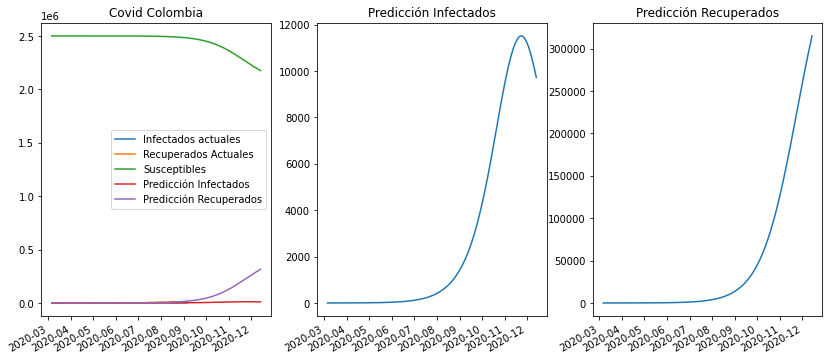

In [ ]:
s_0 = 2500000
i_0 = 1
r_0 = 0.76
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('2020-09-06', periods=100))))) #  months from 5th May
train(recovered, infected, data)

**Largo Plazo - 1000 D√≠as**

      fun: 1761.7662235340124
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.67324288e-01, -6.58737940e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 207
      nit: 38
   status: 0
  success: True
        x: array([0.44158469, 0.4       ])
El intervalo de confianza es: (965.1158595671146, 819.921885106132, 1110.3098340280972)
country=Colombia, beta=0.44158469, gamma=0.40000000, r_0:1.10396173


Infectados actuales  ... Predicci√≥n Recuperados
2023-02-23                None  ...          455955.661100
2023-02-24                None  ...          455955.661100
2023-02-25                None  ...          455955.661100
2023-02-26                None  ...          455955.661101
2023-02-27                None  ...          455955.661101
...                        ...  ...                    ...
2023-05-29                None  ...          455955.661089
2023-05-30                None  ...          455955.661089
2023-05-31                None  ...          455955.661089
2023-06-01                None  ...          455955.661089
2023-06-02                None  ...          455955.661089

[100 rows x 5 columns]

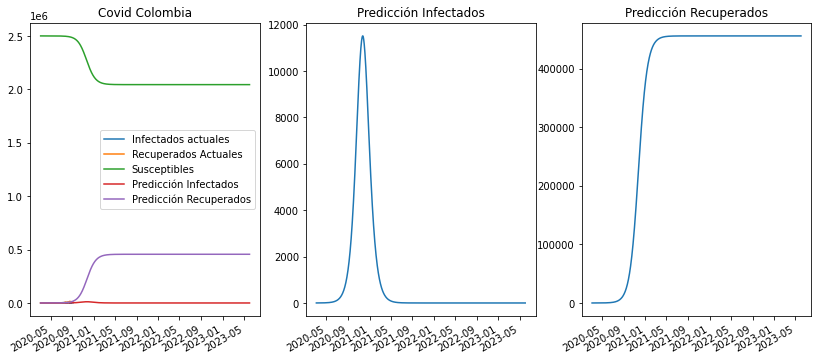

In [ ]:
s_0 = 2500000
i_0 = 1
r_0 = 0.76
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('2020-09-06', periods=1000))))) #  months from 5th May
train(recovered, infected, data)

#### Cali ARIMA

In [ ]:
##Actualizo el df temporal con la ciudad.
datos_arima_XX = datos_arima_CAL.copy()
## Separo los valores entre train y test.
train_size = int(len(datos_arima_XX) * 0.80)
test_size = len(datos_arima_XX) - train_size
train_data, test_data = datos_arima_XX[0:train_size], datos_arima_XX[train_size:]

Train

In [ ]:
# ESTABLEZCO EL TAMA√ëO ESTACIONAL QUE DE ACUERDO A LOS DATOS DE 'TEST' DISMINUYA EL ERROR ABSOLUTO PROMEDIO.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
## Generar los par√°metros del ARIMA, a partir del train data.
MAE = []
for x in range(15, 26):
  mod = sm.tsa.statespace.SARIMAX(train_data['Casos'],
                                  order=(1, 2, 2),
                                  seasonal_order=(1, 1, 1, x),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

  results = mod.fit()

  ## Genero las predicciones.
  arima_pred = results.predict(start = len(train_data)+1, end = len(datos_arima_XX) , dynamic=False, typ="levels").rename("Pronostico")

  ## Genero la lista de dias para indexar el df 'arima_pred'.
  dateList = []
  dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred))]

  ## Convierto la serie en df y pongo la fecha como index
  arima_pred = pd.DataFrame(data=arima_pred, columns=['Pronostico'])
  arima_pred['fecha_reporte_web'] = dateList
  arima_pred = arima_pred.set_index(['fecha_reporte_web'])

  ## Creo df para comparar train y test.
  metric_df = arima_pred.join(datos_arima_XX['Casos'])
  metric_df.dropna(inplace=True)
  
  MAE.append([x, mean_absolute_error(metric_df.Casos, metric_df.Pronostico)])
minMAE = pd.DataFrame(MAE,columns=['Tama√±o_estac','Error'])
E = minMAE['Tama√±o_estac'].loc[minMAE['Error'].idxmin()]


In [ ]:
## Generar los par√°metros del ARIMA, a partir del train data.
mod = sm.tsa.statespace.SARIMAX(train_data['Casos'],
                                order=(1, 2, 2),
                                seasonal_order=(1, 1, 1, E),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1864      0.093     -1.999      0.046      -0.369      -0.004
ma.L1         -2.0042      0.127    -15.797      0.000      -2.253      -1.756
ma.L2          0.9995      0.129      7.767      0.000       0.747       1.252
ar.S.L18      -0.8397      0.254     -3.311      0.001      -1.337      -0.343
ma.S.L18      -0.3812      0.311     -1.225      0.221      -0.991       0.229
sigma2      5850.8385   4.37e-05   1.34e+08      0.000    5850.838    5850.839


 Test


In [ ]:
## Genero las predicciones.
arima_pred = results.predict(start = len(train_data)+1, end = len(datos_arima_XX) , dynamic=False, typ="levels").rename("Pronostico")

## Genero la lista de dias para indexar el df 'arima_pred'
dateList = []
dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred))]

## Convierto la serie en df y pongo la fecha como index
arima_pred = pd.DataFrame(data=arima_pred, columns=['Pronostico'])
arima_pred['fecha_reporte_web'] = dateList
#casos['fecha_reporte_web'] = pd.to_datetime(casos['fecha_reporte_web']) #Convertir a fecha
arima_pred = arima_pred.set_index(['fecha_reporte_web'])


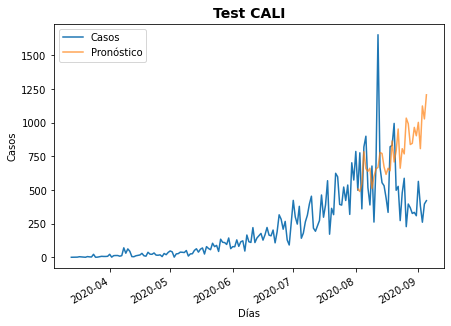

In [ ]:
ax = datos_arima_XX['2020':].plot(label='Reales',figsize=(7, 5))
arima_pred['Pronostico'].plot(ax=ax, label='Pron√≥stico', alpha=.7)

conf_int = 2 * arima_pred.std()

#plt.fill_between(conf_int.index, 
#                 arima_pred-conf_int, 
#                 arima_pred+conf_int, 
#                 color='b', alpha=.1)
ax.set_title('Test CALI', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.legend()

plt.show()

In [ ]:
## Creo df para comparar train y test.
metric_df = arima_pred.join(datos_arima_XX['Casos'])
metric_df.dropna(inplace=True)


In [ ]:
r2_score(metric_df['Casos'], metric_df["Pronostico"])

-1.5360064111132488

In [ ]:
prophet_rmse_error = rmse(metric_df['Casos'], metric_df["Pronostico"])
prophet_mse_error = prophet_rmse_error**2

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}')

MSE Error: 189713.89883605036
RMSE Error: 435.5615901753165


In [ ]:
mean_absolute_error(metric_df.Casos, metric_df.Pronostico)

357.2305537978599

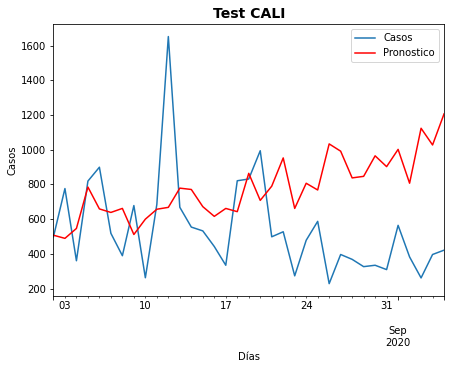

In [ ]:
ax=test_data.plot(legend=True, figsize=(7,5))
arima_pred.plot(ax=ax,legend = True, color='red')
ax.set_title('Test CALI', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.show()


Generalizaci√≥n

In [ ]:
last_day = 90    ##Cantidad de dias a predecir.

In [ ]:
## Genero las predicciones.
arima_pred_CAL = results.predict(start = len(train_data)+1, end = len(train_data)+1+last_day , typ="levels").rename("Pronostico")

## Genero la lista de dias para indexar el df 'arima_pred'
dateList = []
dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred_CAL))]

## Convierto la serie en df y pongo la fecha como index
arima_pred_CAL = pd.DataFrame(data=arima_pred_CAL, columns=['Pronostico'])
arima_pred_CAL['fecha_reporte_web'] = dateList
arima_pred_CAL = arima_pred_CAL.set_index(['fecha_reporte_web'])


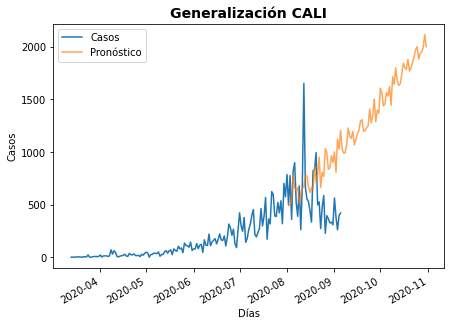

In [ ]:
ax = datos_arima_XX['2020':].plot(label='Reales',figsize=(7, 5))
arima_pred_CAL['Pronostico'].plot(ax=ax, label='Pron√≥stico', alpha=.7)

#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_title('Generalizaci√≥n CALI', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.legend()

plt.show()

###BARRANQUILLA

####Barranquilla SIR

In [ ]:
casos_dia_SIR_BAQ = casos_imp_SIR.copy()
casos_dia_SIR_BAQ[casos_dia_SIR_BAQ['Ciudad_de_ubicaci√≥n'].isin(['Barranquilla'])]
dfb=casos_dia_SIR_BAQ.copy()
f_reporteb=pd.DataFrame()
f_reporteb['cantidad_reporte']=dfb.groupby('fecha_reporte_web').size()
f_reporteb['f_reporte']=f_reporteb.index
Df1b=dfb[dfb['atenci√≥n'] == 'Fallecido']
f_muerteb=pd.DataFrame()
f_muerteb['cantidad_muertes']=Df1b.groupby('Fecha_de_muerte').size()
f_muerteb['f_muerte']=f_muerteb.index
Df2b=dfb[dfb['atenci√≥n'] == 'Recuperado']
f_recuperadob=pd.DataFrame()
f_recuperadob['cantidad_recuperados']=Df2b.groupby('Fecha_recuperado').size()
f_recuperadob['f_recuperados']=f_recuperadob.index
cons1b=pd.merge(f_reporteb, f_muerteb, left_on='f_reporte', right_on='f_muerte', how='left')
consb=pd.merge(cons1b, f_recuperadob, left_on='f_reporte', right_on='f_recuperados', how='left')
cols1 = ['f_reporte', 'cantidad_reporte','cantidad_recuperados','cantidad_muertes']
df1b=consb[cols1]
df2b = df1b.fillna(0)
df3b=df2b.copy()
df3b['Activos']=abs(df3b['cantidad_reporte']-df3b['cantidad_recuperados']-df3b['cantidad_muertes'])
data = df3b.set_index('f_reporte')['Activos']
infected = df3b.set_index('f_reporte')['cantidad_reporte']
recovered = df3b.set_index('f_reporte')['cantidad_recuperados']


**Corto Plazo - 100 D√≠as**

      fun: 1732.9244050399943
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.12866177e-01, -7.17149464e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 114
      nit: 17
   status: 0
  success: True
        x: array([0.44183113, 0.4       ])
El intervalo de confianza es: (1621.1185680853305, 1383.3219493259696, 1858.9151868446913)
country=Colombia, beta=0.44183113, gamma=0.40000000, r_0:1.10457783


Infectados actuales  ... Predicci√≥n Recuperados
2020-09-06                None  ...           17019.935353
2020-09-07                None  ...           17682.975434
2020-09-08                None  ...           18369.764524
2020-09-09                None  ...           19081.041636
2020-09-10                None  ...           19817.522003
...                        ...  ...                    ...
2020-12-10                None  ...          176322.584430
2020-12-11                None  ...          177691.364999
2020-12-12                None  ...          179026.048562
2020-12-13                None  ...          180326.902890
2020-12-14                None  ...          181594.260513

[100 rows x 5 columns]

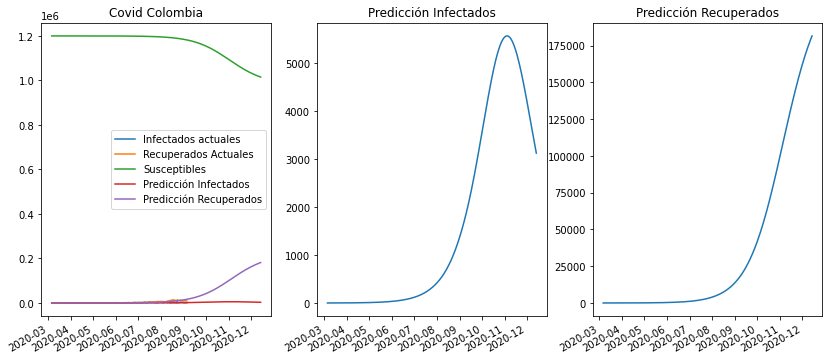

In [ ]:
s_0 = 1200000
i_0 = 1
r_0 = 0.76
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('2020-09-06', periods=100))))) #  months from 5th May
train(recovered, infected, data)

**Largo Plazo - 1000 D√≠as**

      fun: 1732.9244050399943
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.12866177e-01, -7.17149464e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 114
      nit: 17
   status: 0
  success: True
        x: array([0.44183113, 0.4       ])
El intervalo de confianza es: (465.43084824978155, 395.20139668004924, 535.6602998195139)
country=Colombia, beta=0.44183113, gamma=0.40000000, r_0:1.10457783


Infectados actuales  ... Predicci√≥n Recuperados
2023-02-23                None  ...          219879.515804
2023-02-24                None  ...          219879.515803
2023-02-25                None  ...          219879.515802
2023-02-26                None  ...          219879.515801
2023-02-27                None  ...          219879.515800
...                        ...  ...                    ...
2023-05-29                None  ...          219879.515804
2023-05-30                None  ...          219879.515804
2023-05-31                None  ...          219879.515804
2023-06-01                None  ...          219879.515804
2023-06-02                None  ...          219879.515805

[100 rows x 5 columns]

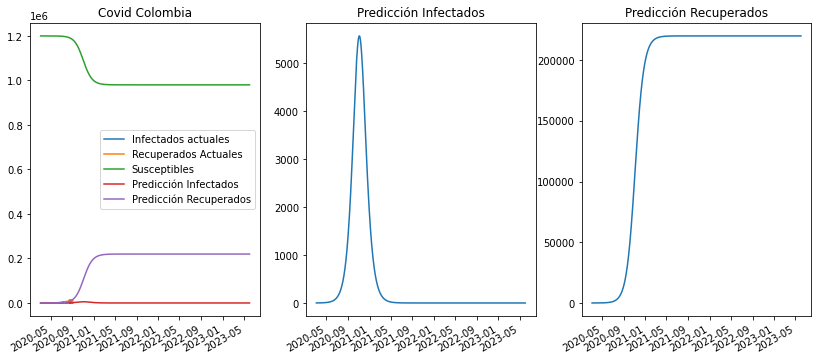

In [ ]:
s_0 = 1200000
i_0 = 1
r_0 = 0.76
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('2020-09-06', periods=1000))))) #  months from 5th May
train(recovered, infected, data)

#### Barranquilla ARIMA

In [ ]:
#Actualizo el df temporal con la ciudad.
datos_arima_XX = datos_arima_BAQ.copy()
## Separo los valores entre train y test.
train_size = int(len(datos_arima_XX) * 0.65)
test_size = len(datos_arima_XX) - train_size
train_data, test_data = datos_arima_XX[0:train_size], datos_arima_XX[train_size:]

Train

In [ ]:
# ESTABLEZCO EL TAMA√ëO ESTACIONAL QUE DE ACUERDO A LOS DATOS DE 'TEST' DISMINUYA EL ERROR ABSOLUTO PROMEDIO.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
## Generar los par√°metros del ARIMA, a partir del train data.
MAE = []
for x in range(15, 26):
  mod = sm.tsa.statespace.SARIMAX(train_data['Casos'],
                                  order=(1, 2, 2),
                                  seasonal_order=(1, 2, 1, x),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

  results = mod.fit()

  ## Genero las predicciones.
  arima_pred = results.predict(start = len(train_data)+1, end = len(datos_arima_XX) , dynamic=False, typ="levels").rename("Pronostico")

  ## Genero la lista de dias para indexar el df 'arima_pred'.
  dateList = []
  dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred))]

  ## Convierto la serie en df y pongo la fecha como index
  arima_pred = pd.DataFrame(data=arima_pred, columns=['Pronostico'])
  arima_pred['fecha_reporte_web'] = dateList
  arima_pred = arima_pred.set_index(['fecha_reporte_web'])

  ## Creo df para comparar train y test.
  metric_df = arima_pred.join(datos_arima_XX['Casos'])
  metric_df.dropna(inplace=True)
  
  MAE.append([x, mean_absolute_error(metric_df.Casos, metric_df.Pronostico)])
minMAE = pd.DataFrame(MAE,columns=['Tama√±o_estac','Error'])
E = minMAE['Tama√±o_estac'].loc[minMAE['Error'].idxmin()]


In [ ]:
## Generar los par√°metros del ARIMA, a partir del train data.
mod = sm.tsa.statespace.SARIMAX(train_data['Casos'],
                                order=(1, 1, 2),
                                seasonal_order=(1, 1, 1, E),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4142         -0        inf      0.000      -0.414      -0.414
ma.L1         -0.6883         -0        inf      0.000      -0.688      -0.688
ma.L2          0.1979   2.05e-32   9.67e+30      0.000       0.198       0.198
ar.S.L23      -2.1326   1.24e-32  -1.72e+32      0.000      -2.133      -2.133
ma.S.L23    2.821e+14    1.7e-33   1.66e+47      0.000    2.82e+14    2.82e+14
sigma2      3.791e-12   2.52e-10      0.015      0.988    -4.9e-10    4.97e-10


 Test


In [ ]:
## Genero las predicciones.
arima_pred = results.predict(start = len(train_data)+1, end = len(datos_arima_XX) , dynamic=False, typ="levels").rename("Pronostico")

## Genero la lista de dias para indexar el df 'arima_pred'
dateList = []
dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred))]

## Convierto la serie en df y pongo la fecha como index
arima_pred = pd.DataFrame(data=arima_pred, columns=['Pronostico'])
arima_pred['fecha_reporte_web'] = dateList
#casos['fecha_reporte_web'] = pd.to_datetime(casos['fecha_reporte_web']) #Convertir a fecha
arima_pred = arima_pred.set_index(['fecha_reporte_web'])


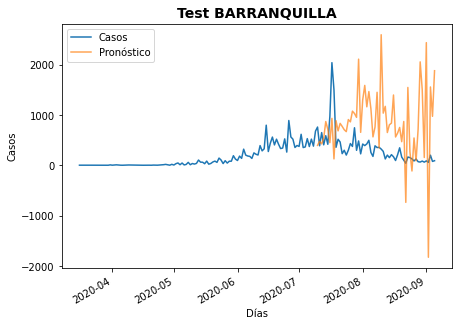

In [ ]:
ax = datos_arima_XX['2020':].plot(label='Reales',figsize=(7, 5))
arima_pred['Pronostico'].plot(ax=ax, label='Pron√≥stico', alpha=.7)

conf_int = 2 * arima_pred.std()

#plt.fill_between(conf_int.index, 
#                 arima_pred-conf_int, 
#                 arima_pred+conf_int, 
#                 color='b', alpha=.1)
ax.set_title('Test BARRANQUILLA', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.legend()

plt.show()

In [ ]:
## Creo df para comparar train y test.
metric_df = arima_pred.join(datos_arima_XX['Casos'])
metric_df.dropna(inplace=True)


In [ ]:
r2_score(metric_df['Casos'], metric_df["Pronostico"])

-6.61474374040314

In [ ]:
prophet_rmse_error = rmse(metric_df['Casos'], metric_df["Pronostico"])
prophet_mse_error = prophet_rmse_error**2

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}')

MSE Error: 858724.1496625554
RMSE Error: 926.6737018295897


In [ ]:
mean_absolute_error(metric_df.Casos, metric_df.Pronostico)

740.0495382243059

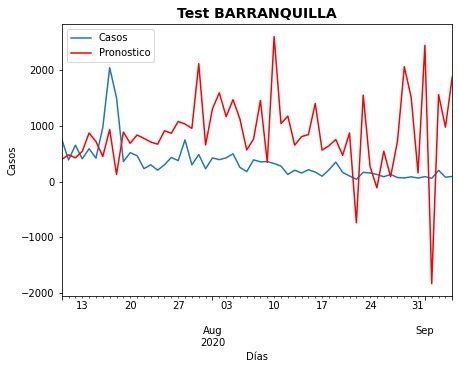

In [ ]:
ax=test_data.plot(legend=True, figsize=(7,5))
arima_pred.plot(ax=ax,legend = True, color='red')
ax.set_title('Test BARRANQUILLA', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.show()


Generalizaci√≥n

In [ ]:
last_day = 150    ##Cantidad de dias a predecir.

In [ ]:
## Genero las predicciones.
arima_pred_BAQ = results.predict(start = len(train_data)+1, end = len(train_data)+1+last_day , typ="levels").rename("Pronostico")

## Genero la lista de dias para indexar el df 'arima_pred'
dateList = []
dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred_BAQ))]

## Convierto la serie en df y pongo la fecha como index
arima_pred_BAQ = pd.DataFrame(data=arima_pred_BAQ, columns=['Pronostico'])
arima_pred_BAQ['fecha_reporte_web'] = dateList
arima_pred_BAQ = arima_pred_BAQ.set_index(['fecha_reporte_web'])


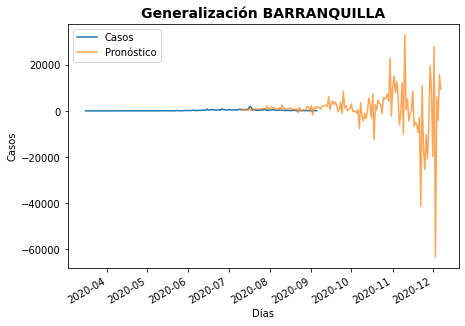

In [ ]:
ax = datos_arima_XX['2020':].plot(label='Reales',figsize=(7, 5))
arima_pred_BAQ['Pronostico'].plot(ax=ax, label='Pron√≥stico', alpha=.7)

#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_title('Generalizaci√≥n BARRANQUILLA', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.legend()

plt.show()

###CARTAGENA

#### Cartagena de Indias SIR

In [ ]:
casos_dia_SIR_CAR = casos_imp_SIR.copy()
casos_dia_SIR_CAR= casos_dia_SIR_CAR[casos_dia_SIR_CAR['Ciudad_de_ubicaci√≥n'].isin(['Cartagena de Indias'])]
dfcar=casos_dia_SIR_CAR.copy()
f_reportecar=pd.DataFrame()
f_reportecar['cantidad_reporte']=dfcar.groupby('fecha_reporte_web').size()
f_reportecar['f_reporte']=f_reportecar.index
Df1car=dfcar[dfcar['atenci√≥n'] == 'Fallecido']
f_muertecar=pd.DataFrame()
f_muertecar['cantidad_muertes']=Df1car.groupby('Fecha_de_muerte').size()
f_muertecar['f_muerte']=f_muertecar.index
Df2car=dfcar[dfcar['atenci√≥n'] == 'Recuperado']
f_recuperadocar=pd.DataFrame()
f_recuperadocar['cantidad_recuperados']=Df2car.groupby('Fecha_recuperado').size()
f_recuperadocar['f_recuperados']=f_recuperadocar.index
cons1car=pd.merge(f_reportecar, f_muertecar, left_on='f_reporte', right_on='f_muerte', how='left')
conscar=pd.merge(cons1car, f_recuperadocar, left_on='f_reporte', right_on='f_recuperados', how='left')
cols1 = ['f_reporte', 'cantidad_reporte','cantidad_recuperados','cantidad_muertes']
df1car=cons[cols1]
df2car = df1car.fillna(0)
df3car=df2car.copy()
df3car['Activos']=abs(df3car['cantidad_reporte']-df3car['cantidad_recuperados']-df3car['cantidad_muertes'])
data = df3car.set_index('f_reporte')['Activos']
infected = df3car.set_index('f_reporte')['cantidad_reporte']
recovered = df3car.set_index('f_reporte')['cantidad_recuperados']

**Corto Plazo - 100 D√≠as**

      fun: 1715.119798006008
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.98946678e-02, -7.52791379e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 96
      nit: 18
   status: 0
  success: True
        x: array([0.44198402, 0.4       ])
El intervalo de confianza es: (1291.4168374786113, 1110.498397278304, 1472.3352776789186)
country=Colombia, beta=0.44198402, gamma=0.40000000, r_0:1.10496005


Infectados actuales  ... Predicci√≥n Recuperados
2020-09-06                None  ...           16953.303391
2020-09-07                None  ...           17597.140950
2020-09-08                None  ...           18262.682770
2020-09-09                None  ...           18950.499125
2020-09-10                None  ...           19661.126912
...                        ...  ...                    ...
2020-12-10                None  ...          141474.860128
2020-12-11                None  ...          142334.762799
2020-12-12                None  ...          143170.278308
2020-12-13                None  ...          143981.808143
2020-12-14                None  ...          144769.809892

[100 rows x 5 columns]

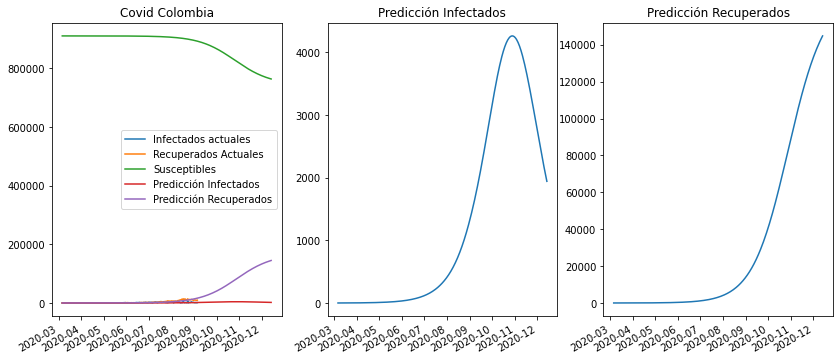

In [ ]:
s_0 = 910000
i_0 = 1
r_0 = 0.76
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('2020-09-06', periods=100))))) #  months from 5th May
train(recovered, infected, data)

**Largo Plazo - 1000 D√≠as**

      fun: 1715.119798006008
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.98946678e-02, -7.52791379e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 96
      nit: 18
   status: 0
  success: True
        x: array([0.44198402, 0.4       ])
El intervalo de confianza es: (354.31910738991564, 300.7041494026376, 407.9340653771937)
country=Colombia, beta=0.44198402, gamma=0.40000000, r_0:1.10496005


Infectados actuales  ... Predicci√≥n Recuperados
2023-02-23                None  ...          167379.098432
2023-02-24                None  ...          167379.098431
2023-02-25                None  ...          167379.098431
2023-02-26                None  ...          167379.098430
2023-02-27                None  ...          167379.098430
...                        ...  ...                    ...
2023-05-29                None  ...          167379.098430
2023-05-30                None  ...          167379.098430
2023-05-31                None  ...          167379.098430
2023-06-01                None  ...          167379.098430
2023-06-02                None  ...          167379.098430

[100 rows x 5 columns]

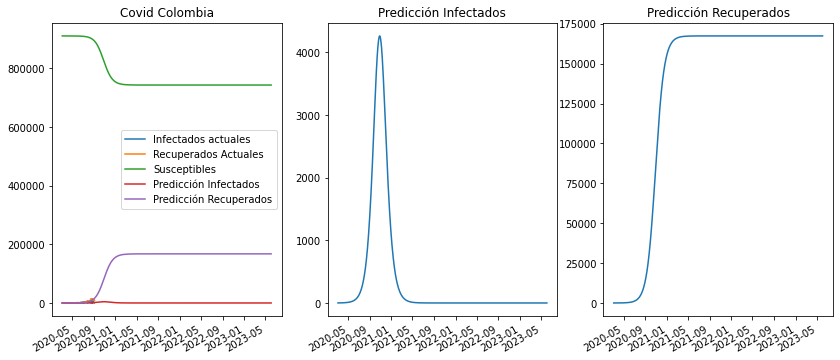

In [ ]:
s_0 = 910000
i_0 = 1
r_0 = 0.76
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('2020-09-06', periods=1000))))) #  months from 5th May
train(recovered, infected, data)

#### Cartagena ARIMA

In [ ]:
#Actualizo el df temporal con la ciudad.
datos_arima_XX = datos_arima_CAR.copy()
## Separo los valores entre train y test.
train_size = int(len(datos_arima_XX) * 0.65)
test_size = len(datos_arima_XX) - train_size
train_data, test_data = datos_arima_XX[0:train_size], datos_arima_XX[train_size:]

Train

In [ ]:
# ESTABLEZCO EL TAMA√ëO ESTACIONAL QUE DE ACUERDO A LOS DATOS DE 'TEST' DISMINUYA EL ERROR ABSOLUTO PROMEDIO.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
## Generar los par√°metros del ARIMA, a partir del train data.
MAE = []
for x in range(15, 26):
  mod = sm.tsa.statespace.SARIMAX(train_data['Casos'],
                                  order=(1, 2, 2),
                                  seasonal_order=(1, 1, 1, x),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

  results = mod.fit()

  ## Genero las predicciones.
  arima_pred = results.predict(start = len(train_data)+1, end = len(datos_arima_XX) , dynamic=False, typ="levels").rename("Pronostico")

  ## Genero la lista de dias para indexar el df 'arima_pred'.
  dateList = []
  dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred))]

  ## Convierto la serie en df y pongo la fecha como index
  arima_pred = pd.DataFrame(data=arima_pred, columns=['Pronostico'])
  arima_pred['fecha_reporte_web'] = dateList
  arima_pred = arima_pred.set_index(['fecha_reporte_web'])

  ## Creo df para comparar train y test.
  metric_df = arima_pred.join(datos_arima_XX['Casos'])
  metric_df.dropna(inplace=True)
  
  MAE.append([x, mean_absolute_error(metric_df.Casos, metric_df.Pronostico)])
minMAE = pd.DataFrame(MAE,columns=['Tama√±o_estac','Error'])
E = minMAE['Tama√±o_estac'].loc[minMAE['Error'].idxmin()]


In [ ]:
## Generar los par√°metros del ARIMA, a partir del train data.
mod = sm.tsa.statespace.SARIMAX(train_data['Casos'],
                                order=(1, 2, 2),
                                seasonal_order=(1, 1, 1, E),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1739      0.349     -0.499      0.618      -0.857       0.510
ma.L1         -1.4401      0.670     -2.150      0.032      -2.753      -0.127
ma.L2          0.4196      0.504      0.832      0.406      -0.569       1.408
ar.S.L17       0.0101      0.085      0.119      0.905      -0.156       0.176
ma.S.L17      -0.8653      0.542     -1.598      0.110      -1.927       0.196
sigma2      3699.8372   2289.520      1.616      0.106    -787.540    8187.214


 Test


In [ ]:
## Genero las predicciones.
arima_pred = results.predict(start = len(train_data)+1, end = len(datos_arima_XX) , dynamic=False, typ="levels").rename("Pronostico")

## Genero la lista de dias para indexar el df 'arima_pred'
dateList = []
dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred))]

## Convierto la serie en df y pongo la fecha como index
arima_pred = pd.DataFrame(data=arima_pred, columns=['Pronostico'])
arima_pred['fecha_reporte_web'] = dateList
#casos['fecha_reporte_web'] = pd.to_datetime(casos['fecha_reporte_web']) #Convertir a fecha
arima_pred = arima_pred.set_index(['fecha_reporte_web'])


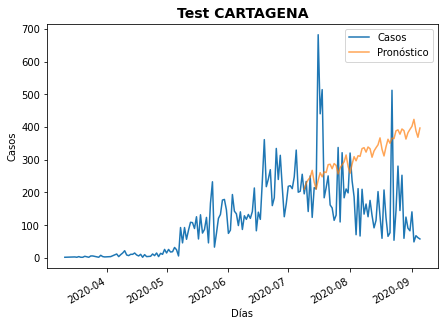

In [ ]:
ax = datos_arima_XX['2020':].plot(label='Reales',figsize=(7, 5))
arima_pred['Pronostico'].plot(ax=ax, label='Pron√≥stico', alpha=.7)

conf_int = 2 * arima_pred.std()

#plt.fill_between(conf_int.index, 
#                 arima_pred-conf_int, 
#                 arima_pred+conf_int, 
#                 color='b', alpha=.1)
ax.set_title('Test CARTAGENA', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.legend()

plt.show()

In [ ]:
## Creo df para comparar train y test.
metric_df = arima_pred.join(datos_arima_XX['Casos'])
metric_df.dropna(inplace=True)


In [ ]:
r2_score(metric_df['Casos'], metric_df["Pronostico"])

-1.800801314625755

In [ ]:
prophet_rmse_error = rmse(metric_df['Casos'], metric_df["Pronostico"])
prophet_mse_error = prophet_rmse_error**2

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}')

MSE Error: 41168.65748957752
RMSE Error: 202.90060987975744


In [ ]:
mean_absolute_error(metric_df.Casos, metric_df.Pronostico)

174.4899748455987

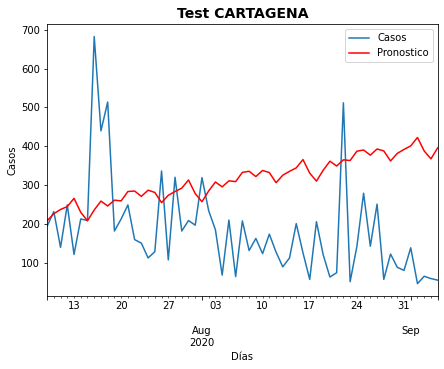

In [ ]:
ax=test_data.plot(legend=True, figsize=(7,5))
arima_pred.plot(ax=ax,legend = True, color='red')
ax.set_title('Test CARTAGENA', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.show()


Generalizaci√≥n

In [ ]:
last_day = 90    ##Cantidad de dias a predecir.

In [ ]:
## Genero las predicciones.
arima_pred_CAR = results.predict(start = len(train_data)+1, end = len(train_data)+1+last_day , typ="levels").rename("Pronostico")

## Genero la lista de dias para indexar el df 'arima_pred'
dateList = []
dateList = [test_data.index[0] + datetime.timedelta(days = x) for x in range (0, len(arima_pred_CAR))]

## Convierto la serie en df y pongo la fecha como index
arima_pred_CAR = pd.DataFrame(data=arima_pred_CAR, columns=['Pronostico'])
arima_pred_CAR['fecha_reporte_web'] = dateList
arima_pred_CAR = arima_pred_CAR.set_index(['fecha_reporte_web'])


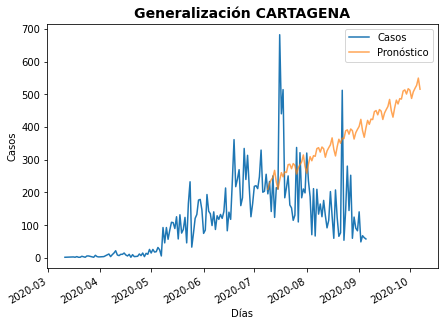

In [ ]:
ax = datos_arima_XX['2020':].plot(label='Reales',figsize=(7, 5))
arima_pred_CAR['Pronostico'].plot(ax=ax, label='Pron√≥stico', alpha=.7)

#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_title('Generalizaci√≥n CARTAGENA', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('D√≠as')
ax.set_ylabel('Casos')
plt.legend()

plt.show()

***


#**Conclusiones Finales**

1. Durante la limpieza de los datos se identificaron muchas inconsistencias en estos (Valores null "Fechas, Estados del paciente"), pero por cuestiones de tiempo y desconocimiento en el proceso de recolecci√≥n de estos fue necesario realizar muchas suposiciones que se entiende no fueron las m√°s acertadas para el modelo.

2. El modelo SIR planteado presenta muchas oportunidades de mejora para futuros 
escenarios ya que como se mencion√≥ anteriormente para este caso no se tuvo presente situaciones como la cuarentena estricta o que una misma persona puede contraer el virus m√°s de una vez, pero a pesar de esto es importante resaltar que al comparar los datos reales de COVID que se han venido presentando hasta la fecha el modelo se comporta muy similar para los pr√≤ximos 20-30 d√≠as,sin embargo quedan abiertas inquietudes respecto al 2021 ya que el SIR indica que todos los picos van a darse en este periodo, pero seg√∫n lo que hemos venido viviendo se espera que ocurra lo contrario.

3. Para los escenarios ‚ÄúNacional‚Äù, ‚ÄúBogot√°‚Äù, ‚ÄúCali‚Äù y "Cartagena", el modelo ARIMA proporciona una predicci√≥n del comportamiento del COVID-19 con una tendencia lineal creciente, en respuesta a los datos que sirvieron de muestra para el entrenamiento.

4. Para el caso de Medell√≠n, el modelo logra interpretar una tendencia decremental del comportamiento de los casos de infectados, pero sin desestimar la posibilidad de un repunte de casos, situaci√≥n que no sucede en modelos est√°ndar como el SIR.

5. Es de esperarse que con las nuevas observaciones que ingresen al dataset en los pr√≥ximos d√≠as, se logre una mayor claridad en la tendencia del comportamiento de los datos, y se logre una predicci√≥n mas exacta del comportamiento esperado.

6. Debido al comportamiento de los datos de entrenamiento, el modelo ARIMA tiene una baja capacidad de predicci√≥n para la ciudad de barranquilla, present√°ndose una alta fluctuaci√≥n de los datos debido a que la estructura autorregresiva del modelo, no permite una buena tasa de aprendizaje, y dada la tendencia decreciente de los datos m√°s recientes con los que cont√≥ la muestra de entrenamiento, se llega en algunos casos a predecir valores negativos, los cuales no son posibles en el contexto real del caso de estudio.





**Referencias**

* *Delia Ortega-Lenis, David Arango-Londo√±o, Edgar Mu√±oz, Daniel E. Cuartas, Diana Caicedo, Jorge Mena, Miyerlandi Torres y Fabian Mendez, Predicciones de un modelo SEIR para casos de COVID-19 en Cali, Colombia.*

* *PRECISI√ìN DEL PRON√ìSTICO DE LA PROPAGACI√ìN DEL COVID-19 EN COLOMBIA, D√≠az-Pinz√≥n-Jorge Enrique. Revista Repertorio de Medicina y Cirug√≠a.*

* *Fred G. Manrique-Abril, Carlos A. Agudelo-Calderon, V√≠ctor M. Gonz√°lez-Chord√°, Oscar Guti√©rrez-Lesmes, Cristian F. T√©llez-Pi√±erez, Giomar Herrera-Amaya. Modelo SIR de la pandemia de Covid-19 en Colombia. Rev. salud p√∫blica, Volumen 22, N√∫mero 2, p. 1-9, 2020*

* *Catano-Lopez, Alexandra; Rojas-Diaz, Daniel. Modelos discretos de transmisi√≥n de COVID-19 y publicaciones preliminares en la ciencia: una b√∫squeda sistematizada. Escuela de ciencias, Universidad Eafit, Medell√≠n, Colombia*

* *Sarkar, Dibash; Biswas, Moinak. COVID 19 Pandemic: A Real-time Forecasts & Prediction of Confirmed Cases, Active Cases using the ARIMA model & Public Health in West Bengal, India.https://www.medrxiv.org/content/10.1101/2020.06.06.20124180v1*

* *Balabdaoui, Fadoua;Mohr, Dirk. Age-stratified model of the COVID-19 epidemic to analyze the impact of relaxing lockdown measures: nowcasting and forecasting for Switzerland. https://www.medrxiv.org/content/10.1101/2020.05.08.20095059v2*


* *COVID-19 data with SIR model* https://www.kaggle.com/lisphilar/covid-19-data-with-sir-model/notebook

* *Henri Froese,Infectious Disease Modelling: Beyond the Basic SIR Model*,https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4

* *Fred G. Manrique-Abril, Carlos A. Agudelo-Calderon,
V√≠ctor M. Gonz√°lez-Chord√°, Oscar Guti√©rrez-Lesmes,
Cristian F. T√©llez-Pi√±erez y Giomar Herrera-Amaya. Modelo SIR de la pandemia
de Covid-19 en Colombia* . http://www.scielo.org.co/pdf/rsap/v22n1/0124-0064-rsap-22-01-e185977.pdf


